# Proyecto análisis y gestión de recursos aeroportuarios del Aeroparque Jorge Newbery

### Big Data Bang: explosionando las rutas aéreas para predecir un caos en alto vuelo.
---


Grupo número 2:
* Francisco Brogiolo
* Miguel Cittadini
* Marcelo Bianchi
* Martín Brogiolo

# TP 2 Análisis Exploratorio y Curación de Datos

En este TP, vamos a tomar directamente de Github la base de datos trabajada en el TP1, para así agilizar el código y no tener que correr todo de nuevo cada vez que entramos.

In [1]:
activar_ydata_profiling = "No"

In [2]:
if activar_ydata_profiling == "Si":
  #Instalación de librerías externas
  !pip install -q pingouin
  !pip install --upgrade Pillow           # para que funcione ydata-profiling
  !pip install -q -U ydata-profiling

  # Recordar reiniciar el runtime para que cargue bien las librerías

In [3]:
if activar_ydata_profiling == "Si":
# Actualización de ydata-profiling a la última versión desde GitHub
  !pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#https://raw.githubusercontent.com/Fran-Brogiolo/AprendizajeSupervisado/master/Mentor%C3%ADa%20Big%20Data%20Bang/Base_Final_TP1.csv
df = pd.read_csv("https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Base_Final_TP1.csv")
df.Horario_Prog_Arribo = pd.to_datetime(df.Horario_Prog_Arribo,dayfirst=True)
df.Horario_Estimado_Arribo = pd.to_datetime(df.Horario_Estimado_Arribo)
df.Horario_Actual_Arribo = pd.to_datetime(df.Horario_Actual_Arribo,dayfirst=True)
df.Cant_Pasajeros = pd.to_numeric(df.Cant_Pasajeros)
pd.set_option('display.max_columns', None)
df.shape

(125588, 27)

In [5]:
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               4M         7623        COR 2019-01-01 06:17:00   
2               4M         7653        MDZ 2019-01-01 07:37:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2023-07-07 05:50:00   2019-01-01 06:02:00      1 C P               9   
2     2023-07-07 07:30:00   2019-01-01 07:30:00      1 C P              10   

  Terminal_Arribo Sector Estado_Vuelo  Cinta_Equipajes  Cant_Pasajeros  \
0               A      2          ATE                8           100.0   
1               A      2          ATE                6            36.0   
2               A      2          ATE                8           153.0   

  Matricula_Aeronave Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  \
0              LVHQH           738                       DN          6062   
1              LVBFO           320                       4M          7502   
2              LVGLP           320                       4M          7550   

   Cabecera_Arribo  Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto  \
0             31.0       2019          1           1       Argentina   
1             31.0       2019          1           6       Argentina   
2             13.0       2019          1           7       Argentina   

  Ciudad_Aeropuerto  Latitud_Aeropuerto  Longitud_Aeropuerto  \
0     Puerto Iguazú            -25.7373             -54.4731   
1           Córdoba            -31.3133             -64.2085   
2           Mendoza            -32.8312             -68.7925   

  Capacidad_Max_Aeronave             Uso_Aeronave  
0                    189  Transporte de pasajeros  
1                    180  Transporte de pasajeros  
2                    180  Transporte de pasajeros

Como estaba mal el día de la columna Horario_Estimado_Arribo, lo reemplazamos por el día de la columna Horario_Actual_Arribo:

In [6]:
df['Horario_Estimado_Arribo'] = df.apply(lambda row: row['Horario_Estimado_Arribo'].replace(year=row['Horario_Actual_Arribo'].year, month=row['Horario_Actual_Arribo'].month, day=row['Horario_Actual_Arribo'].day), axis=1)

In [7]:
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               4M         7623        COR 2019-01-01 06:17:00   
2               4M         7653        MDZ 2019-01-01 07:37:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 05:50:00   2019-01-01 06:02:00      1 C P               9   
2     2019-01-01 07:30:00   2019-01-01 07:30:00      1 C P              10   

  Terminal_Arribo Sector Estado_Vuelo  Cinta_Equipajes  Cant_Pasajeros  \
0               A      2          ATE                8           100.0   
1               A      2          ATE                6            36.0   
2               A      2          ATE                8           153.0   

  Matricula_Aeronave Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  \
0              LVHQH           738                       DN          6062   
1              LVBFO           320                       4M          7502   
2              LVGLP           320                       4M          7550   

   Cabecera_Arribo  Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto  \
0             31.0       2019          1           1       Argentina   
1             31.0       2019          1           6       Argentina   
2             13.0       2019          1           7       Argentina   

  Ciudad_Aeropuerto  Latitud_Aeropuerto  Longitud_Aeropuerto  \
0     Puerto Iguazú            -25.7373             -54.4731   
1           Córdoba            -31.3133             -64.2085   
2           Mendoza            -32.8312             -68.7925   

  Capacidad_Max_Aeronave             Uso_Aeronave  
0                    189  Transporte de pasajeros  
1                    180  Transporte de pasajeros  
2                    180  Transporte de pasajeros

#Curacion de datos extra

In [8]:
print(df['Estado_Vuelo'].unique())
# Filtrar el DataFrame por la columna "Estado_Vuelo" si es igual a "CAN" o "ALT"
filtered_df = df[df['Estado_Vuelo'].isin(['CAN', 'ALT'])]

# Imprimir el DataFrame filtrado en formato de tabla
filtered_df

['ATE' 'CAN' 'ALT']


Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
27716               AU        2598Q        AEP 2019-06-24 20:35:00   
52854               AR         1821        FTE 2019-12-10 23:20:00   
53008               AR         1821        FTE 2019-12-11 23:25:00   
53009               AR         1737        IGR 2019-12-11 23:25:00   
53011               AU         2599        RCU 2019-12-11 23:50:00   

      Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo  \
27716     2019-06-24 22:21:00   2019-06-24 22:34:00      1 C P   
52854     2019-12-10 23:20:00   2019-12-10 23:20:00      1 C P   
53008     2019-12-11 23:25:00   2019-12-11 23:25:00      1 C P   
53009     2019-12-11 02:15:00   2019-12-11 23:59:00      1 C P   
53011     2019-12-11 23:51:00   2019-12-11 23:51:00      1 C P   

      Posicion_Arribo Terminal_Arribo Sector Estado_Vuelo  Cinta_Equipajes  \
27716              11               A      N          CAN                0   
52854               7               A      N          ALT                0   
53008               7               A      2          ALT                0   
53009               7               A      N          ALT                0   
53011               7               A      N          ALT                0   

       Cant_Pasajeros Matricula_Aeronave Tipo_Aeronave  \
27716             0.0              LVCHR          E190   
52854             0.0              LVFXQ          738W   
53008             0.0              LVFXQ          738W   
53009             0.0              LVFUC          738W   
53011             0.0              LVFXQ          E190   

      Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  Año_Vuelo  \
27716                       AU          2484             13.0       2019   
52854                       AR          1850             13.0       2019   
53008                       AR          1850             13.0       2019   
53009                       AR          1850             13.0       2019   
53011                       AR          1850             13.0       2019   

       Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
27716          6          20       Argentina      Buenos Aires   
52854         12          23       Argentina       El Calafate   
53008         12          23       Argentina       El Calafate   
53009         12          23       Argentina     Puerto Iguazú   
53011         12          23  Arabia Saudita             Rafha   

       Latitud_Aeropuerto  Longitud_Aeropuerto Capacidad_Max_Aeronave  \
27716            -34.5592             -58.4156                    114   
52854            -50.2803             -72.0531                    189   
53008            -50.2803             -72.0531                    189   
53009            -25.7373             -54.4731                    189   
53011             29.6205              43.4944                    114   

                  Uso_Aeronave  
27716  Transporte de pasajeros  
52854  Transporte de pasajeros  
53008  Transporte de pasajeros  
53009  Transporte de pasajeros  
53011  Transporte de pasajeros

In [9]:
# Eliminar las filas que contienen "ALT" o "CAN" ya que tienen el estado alterado o cancelado, y no tienen pasajeros.
df = df[~df['Estado_Vuelo'].isin(['CAN', 'ALT'])]
df.shape

(125583, 27)

Eliminamos la columna 'Estado_Vuelo' ya que no nos aporta informacion relevante, de 125588 filas solamente 5 no tienen el valor 'ATE'

In [10]:
#Eliminamos columna Estado_vuelo, ya qu eahora no nos aporta información, tenemos todo en ATE
df.drop("Estado_Vuelo", axis=1, inplace=True)
df.shape

(125583, 26)

In [11]:
df[0:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               4M         7623        COR 2019-01-01 06:17:00   
2               4M         7653        MDZ 2019-01-01 07:37:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 05:50:00   2019-01-01 06:02:00      1 C P               9   
2     2019-01-01 07:30:00   2019-01-01 07:30:00      1 C P              10   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                6            36.0              LVBFO   
2               A      2                8           153.0              LVGLP   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1           320                       4M          7502             31.0   
2           320                       4M          7550             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           6       Argentina           Córdoba   
2       2019          1           7       Argentina           Mendoza   

   Latitud_Aeropuerto  Longitud_Aeropuerto Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                    189   
1            -31.3133             -64.2085                    180   
2            -32.8312             -68.7925                    180   

              Uso_Aeronave  
0  Transporte de pasajeros  
1  Transporte de pasajeros  
2  Transporte de pasajeros

Otro dato problematico que hemos detectado es el caso de aviones con mas pasajeros que cantidad maxima de pasajeros o en donde el valor de la capacidad maxima es un string con el valor 'Variable'

In [12]:
df['Capacidad_Max_Aeronave'] = df['Capacidad_Max_Aeronave'].replace('Variable', -1)
df.Capacidad_Max_Aeronave = pd.to_numeric(df.Capacidad_Max_Aeronave)
df['Capacidad_Max_Aeronave'].unique()

array([189, 180, 114,  70,  50,  86,  15, 105,  16, 220,  30,   6,   9,
         5,   8,   4,  12,  90,  -1,  13,  19,  10,  14,  44,   1, 117,
         7, 160,  34, 126,   3,  85,   2, 149,  37,  58, 285], dtype=int64)

In [13]:
corregir_capacidad = True

In [14]:
# Función para actualizar 'Capacidad_Max_Aeronave'
def actualizar_capacidad(row):
    if row['Cant_Pasajeros'] > row['Capacidad_Max_Aeronave']:
        max_pasajeros = df[df['Tipo_Aeronave'] == row['Tipo_Aeronave']]['Cant_Pasajeros'].max()
        row['Capacidad_Max_Aeronave'] = max_pasajeros
    return row

# Aplicar la función a cada fila del DataFrame
if corregir_capacidad: df = df.apply(actualizar_capacidad, axis=1)

<font color = "red"> Aquí dejamos el código para posteriormente, al aplicar ML, probar con y sin vuelos con pasajeros = 0:

In [15]:
#df_no_null = df.drop(df[df['Cant_Pasajeros'] == 0].index)

## 1) Entendiendo el Customer Journey Map:

Funciones útiles para graficar:

In [16]:
def plot_total(df, Vuelos_o_Pasajeros, Agrupar_por,  Prom_tiempo = False, variable_titulo = "empty"):

  if variable_titulo == "empty": variable_titulo=Agrupar_por
  if not Prom_tiempo:
      if Vuelos_o_Pasajeros == "Vuelos":
        df.groupby(df[Agrupar_por]).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
        plt.ylim(0)
        titulo = "Cantidad de " + Vuelos_o_Pasajeros + " por " + variable_titulo
        plt.title(titulo)
        plt.show()

      elif Vuelos_o_Pasajeros == "Pasajeros":
        df.groupby(df[Agrupar_por]).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
        plt.ylim(0)
        titulo = "Cantidad de " + Vuelos_o_Pasajeros + " por " + variable_titulo
        plt.title(titulo)
        plt.show()

  return

In [17]:
def plot_total_por_anio(df, Vuelos_o_Pasajeros, Agrupar_por,  Prom_tiempo = False, variable_titulo = "empty"):

  if variable_titulo == "empty": variable_titulo=Agrupar_por

  if not Prom_tiempo:
      if Vuelos_o_Pasajeros == "Vuelos":
          df[df['Año_Vuelo'] == 2019].groupby(df[Agrupar_por]).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2020].groupby(df[Agrupar_por]).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2021].groupby(df[Agrupar_por]).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2022].groupby(df[Agrupar_por]).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
          plt.ylim(0)
          titulo = "Cantidad de " + Vuelos_o_Pasajeros + " por " + variable_titulo + " por año"
          plt.title(titulo)
          plt.legend(['2019', '2020', '2021', '2022'],loc='lower right')
          plt.show()

      elif Vuelos_o_Pasajeros == "Pasajeros":
          df[df['Año_Vuelo'] == 2019].groupby(df[Agrupar_por]).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2020].groupby(df[Agrupar_por]).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2021].groupby(df[Agrupar_por]).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
          df[df['Año_Vuelo'] == 2022].groupby(df[Agrupar_por]).Cant_Pasajeros.sum().plot(kind='line', figsize=(7, 3))
          plt.ylim(0)
          titulo = "Cantidad de " + Vuelos_o_Pasajeros + " por " + variable_titulo + " por año"
          plt.title(titulo)
          plt.legend(['2019', '2020', '2021', '2022'],loc='lower right')
          plt.show()
  return

### a) ¿Cómo varía el volumen total de arribos según el mes? ¿y por día de la semana?

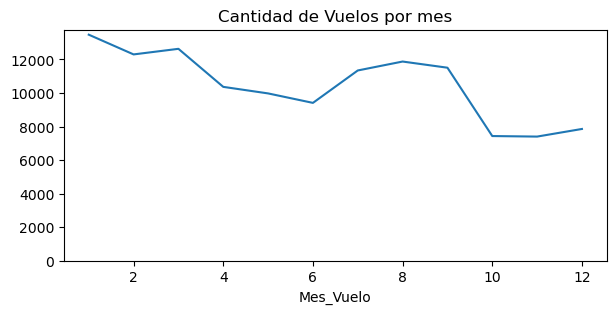

In [18]:
plot_total(df,"Vuelos", "Mes_Vuelo", variable_titulo = "mes") #agregar variable a la función para corregir título y quede más presentable

En este gráfico, vemos que nuestra base de datos contiene muchos más vuelos en entre enero y marzo y entre julio y septiembre que el resto de los meses, con un pico muy marcado en enero.

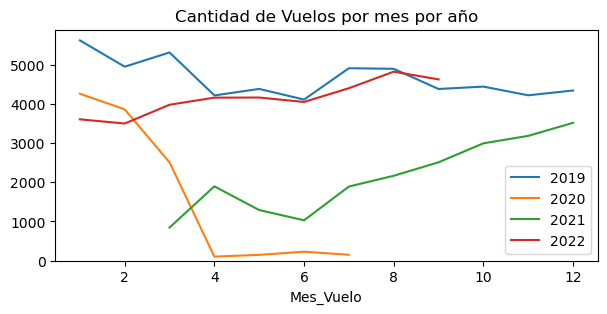

In [19]:
plot_total_por_anio(df,"Vuelos", "Mes_Vuelo",variable_titulo = "mes")

En este gráfico observamos que entre julio 2020 y febrero del 2021 no hubo ni un solo vuelo registrado en nuestra base. Luego encontramos una tendencia creciente de vuelos y desde abril en adelante el 2022 se logra equiparar ya al 2019 en cantidad de vuelos

In [20]:
#Creación de nueva columna que contenga el dia que se realizo cada vuelo
df['Dia_Semana'] = df['Horario_Actual_Arribo'].dt.day_name()

# Crear una columna 'Dia_Semana' como tipo 'Categorical' con el orden deseado
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Dia_Semana'] = pd.Categorical(df['Dia_Semana'], categories=dias_semana_ordenados, ordered=True)


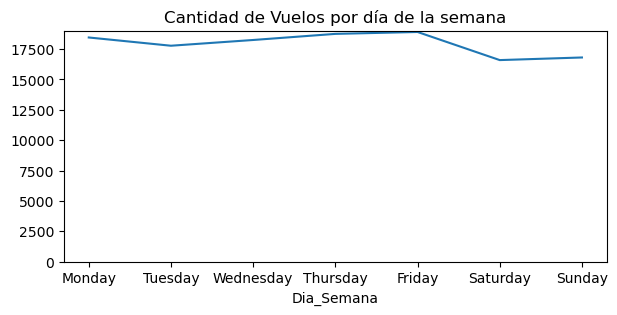

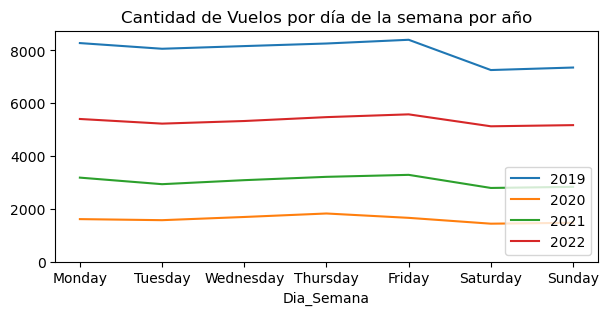

In [21]:
plot_total(df,"Vuelos", "Dia_Semana", variable_titulo = "día de la semana")
plot_total_por_anio(df,"Vuelos", "Dia_Semana", variable_titulo = "día de la semana")

In [22]:
#df_semana = df.groupby(df["Dia_Semana"]).Nombre_Aerolinea.count()
#df_semana.to_csv('df_semana.csv', index=False)
#files.download('df_semana.csv')

Vemos que se mantiene una misma proporción/tendencia en los distintos años, pero con una cantidad de vuelos distinta para cada año, debido a la pandemia o a la falta de datos para completar el año en el caso del 2022.

In [23]:
cantidad_vuelos_por_dia = df['Dia_Semana'].value_counts()

print(cantidad_vuelos_por_dia)
print("Friday (max) vs Saturday (min): ", round(max(cantidad_vuelos_por_dia)/min(cantidad_vuelos_por_dia),2))

Friday       18914
Thursday     18758
Monday       18461
Wednesday    18255
Tuesday      17782
Sunday       16814
Saturday     16599
Name: Dia_Semana, dtype: int64
Friday (max) vs Saturday (min):  1.14


Observamos que los días viernes y jueves es cuando más se viaja, mientras que el sábado es cuando menos se viaja. Sin embargo, la diferencia entre el máximo y el mínimo es del 14%, no la consideramos tan amplia como esperábamos.

In [24]:
# Extraer la columna 'Hora'
df['Hora'] = df['Horario_Prog_Arribo'].dt.time

# Extraer la columna 'HoraAgrupada' sin minutos y segundos
df['Hora_Agrupada'] = df['Horario_Prog_Arribo'].dt.hour


In [25]:
df[:5]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               4M         7623        COR 2019-01-01 06:17:00   
2               4M         7653        MDZ 2019-01-01 07:37:00   
3               AR         1671        NQN 2019-01-01 07:40:00   
4               AR         1611        MDQ 2019-01-01 07:55:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 05:50:00   2019-01-01 06:02:00      1 C P               9   
2     2019-01-01 07:30:00   2019-01-01 07:30:00      1 C P              10   
3     2019-01-01 07:29:00   2019-01-01 07:26:00      1 C P               7   
4     2019-01-01 07:45:00   2019-01-01 07:43:00      1 C P              26   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                6            36.0              LVBFO   
2               A      2                8           153.0              LVGLP   
3               A      2                1            28.0              LVFUA   
4               A      2                2           146.0              LVGVA   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1           320                       4M          7502             31.0   
2           320                       4M          7550             13.0   
3          738W                       AR          1672             13.0   
4          738W                       AR          1496             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           6       Argentina           Córdoba   
2       2019          1           7       Argentina           Mendoza   
3       2019          1           7       Argentina           Neuquén   
4       2019          1           7       Argentina     Mar del Plata   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   180.0   
2            -32.8312             -68.7925                   180.0   
3            -38.9490             -68.1550                   189.0   
4            -37.9342             -57.5734                   189.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada  
0  Transporte de pasajeros    Tuesday  01:50:00              1  
1  Transporte de pasajeros    Tuesday  06:17:00              6  
2  Transporte de pasajeros    Tuesday  07:37:00              7  
3  Transporte de pasajeros    Tuesday  07:40:00              7  
4  Transporte de pasajeros    Tuesday  07:55:00              7

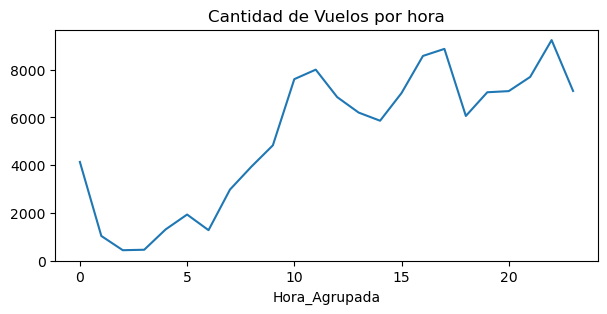

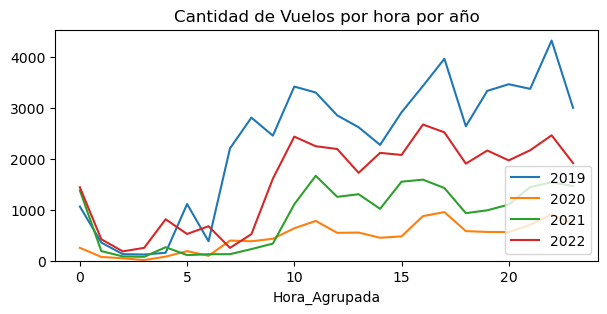

In [26]:
plot_total(df,"Vuelos", "Hora_Agrupada", variable_titulo = "hora")
plot_total_por_anio(df,"Vuelos", "Hora_Agrupada", variable_titulo = "hora")

Hay picos claros a las 10, 16 y 22 hs, con una gran reducción de arribos a la madrugada.

### b) ¿Cómo varía el volumen de pasajeros por mes?

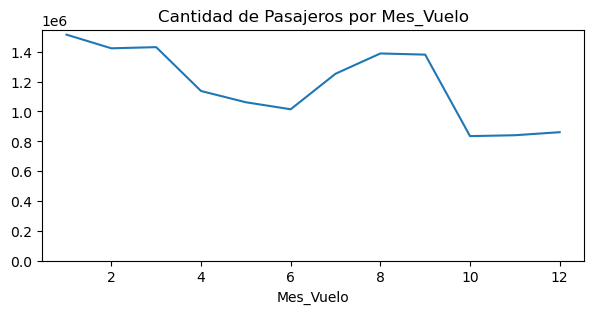

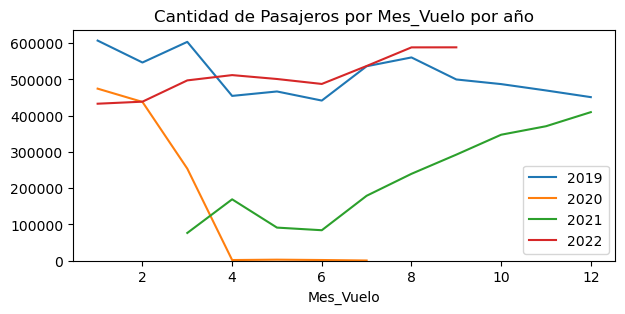

In [27]:
plot_total(df,"Pasajeros", "Mes_Vuelo")
plot_total_por_anio(df,"Pasajeros", "Mes_Vuelo")

Observamos en cantidad de pasajeros una tendencia similar a la cantidad de vuelos.

### c)  ¿Existe alguna tendencia ó fluctuación cíclica en función de la estacionalidad? ¿Hay días especiales en el año?


In [28]:
# Extraer el día y mes sin año y hora
df['Mes_Dia'] = df['Horario_Prog_Arribo'].dt.strftime('%m-%d')
#df['Año_Mes_Dia'] = df['Horario_Prog_Arribo'].dt.strftime('%Y-%m-%d')

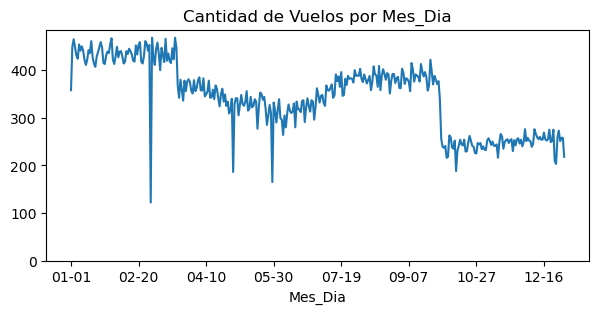

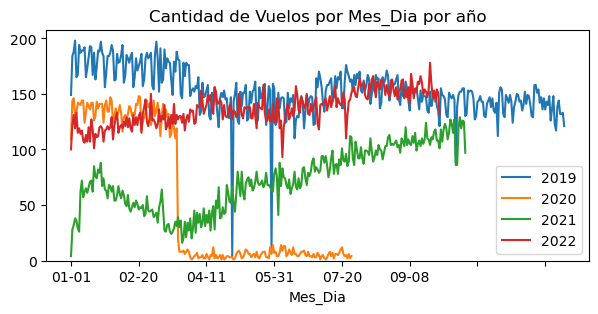

In [29]:
plot_total(df,"Vuelos", "Mes_Dia")
plot_total_por_anio(df,"Vuelos", "Mes_Dia")

Entre enero y marzo notamos una continuidad en la cantidad alta de vuelos, mientras que hay una bajada brusca en abril. En general en épocas de vacaciones de verano y de invierno se observan picos. En el 2019 hay algunos datos con picos bajos, pero no se repite en el 2021 y 2022.Es importante notar que el el grafico que suma todos los años tenemos una baja entre los meses 4 y 7, patron que no coincide con lo que vemos en los años que no son el 2020, esto se debe a la baja de arribos que ocasiono la pandemia

### d)  ¿Cual es la distribución de vuelos provenientes de los distintos orígenes?

In [30]:
#Definimos función para ayudarnos a visualizar datos
def frecuencia_columna(df_usado, columna_target, top = 20):

    # Calcula la cantidad de datos con cada valor en la columna especificada
    cantidad_por_valor = df_usado[columna_target].value_counts().reset_index()

    # Renombra las columnas en el DataFrame resultante
    cantidad_por_valor.columns = [columna_target, 'cantidad']

    cantidad_por_valor['porcentaje'] = cantidad_por_valor['cantidad'] / len(df_usado) * 100

    # Calcula el total
    total = cantidad_por_valor['cantidad'].sum()

    # Agrega una fila adicional para el total
    fila_total = pd.DataFrame({columna_target: 'Total', 'cantidad': total, 'porcentaje': total*100/len(df_usado)}, index=[0])
    cantidad_por_valor = pd.concat([cantidad_por_valor, fila_total], ignore_index=True)

    # Muestra la lista con la cantidad de datos por valor y su porcentaje
    #print(cantidad_por_valor)
    # Muestra solo el top 10 de valores más frecuentes
    top_x= cantidad_por_valor.head(top)

    print("Máximo a mostrar ", top)
    print(top_x)

    return

In [31]:
frecuencia_columna(df, 'Pais_Aeropuerto')

Máximo a mostrar  20
         Pais_Aeropuerto  cantidad  porcentaje
0              Argentina    110052   87.632880
1                Uruguay      5122    4.078578
2                 Brasil      4906    3.906580
3                  Chile      2226    1.772533
4               Paraguay      1068    0.850434
5                   Perú       557    0.443531
6         Arabia Saudita       535    0.426013
7                Bolivia       355    0.282682
8              Venezuela       230    0.183146
9               Colombia       146    0.116258
10        Estados Unidos        95    0.075647
11              Portugal        59    0.046981
12               Ecuador        45    0.035833
13             Australia        36    0.028666
14                España        35    0.027870
15                Suecia        24    0.019111
16     Trinidad y Tobago        12    0.009555
17            Cabo Verde        10    0.007963
18  República Dominicana         8    0.006370
19               Noruega         7    0

A partir del país número 10 en cantidad de vuelos, ya cada país representa menos del 0.1% de los vuelos de la database, por lo cual solo mostramos el top 10. Vemos que Argentina se lleva la gran mayoría de los vuelos, y que con el top 5 de países ya estamos considerando aproximadamente el 99% de nuestros datos.

In [32]:
def plot_vuelos_por_variable(df, variable,top = 10, variable_titulo = "empty"):

  if variable_titulo == "empty": variable_titulo = variable

  # Agrupar y contar la cantidad de vuelos por país
  vuelos_por_variable = df.groupby(df[variable]).Nombre_Aerolinea.count()

  #Ordenar de mayor a menor
  vuelos_por_variable = vuelos_por_variable.sort_values(ascending=False)

  # Tomar solo los top 20 países
  vuelos_por_variable = vuelos_por_variable.head(top)

  # Crear el gráfico de barras
  fig, ax = plt.subplots(figsize=(7, 3))
  ax.bar(vuelos_por_variable.index, vuelos_por_variable)  # Usar el método bar directamente para tener más control

  # Agregar etiquetas de datos giradas 90 grados
  ax.set_xticklabels(vuelos_por_variable.index, rotation=90)


  # Título del gráfico
  #plt.title('Cantidad de vuelos por '+  variable + ' - Total')
  plt.title('Cantidad de vuelos por '+  variable_titulo)
  # Mostrar el gráfico
  plt.show()

  return

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\452591227.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vuelos_por_variable.index, rotation=90)


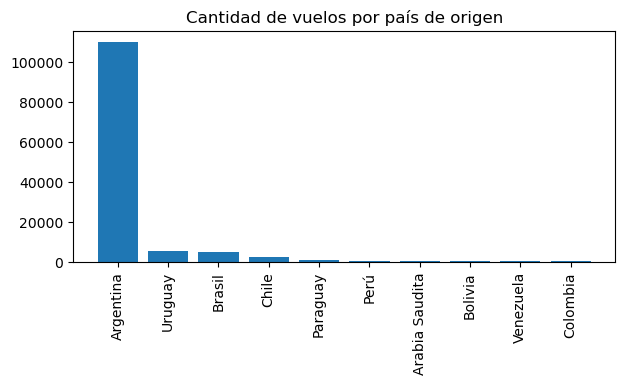

In [33]:
plot_vuelos_por_variable(df, "Pais_Aeropuerto", variable_titulo = "país de origen")

In [34]:
frecuencia_columna(df,'Ciudad_Aeropuerto',30)

Máximo a mostrar  30
          Ciudad_Aeropuerto  cantidad  porcentaje
0                   Córdoba     10290    8.193784
1   San Carlos de Bariloche     10049    8.001879
2                   Mendoza      9260    7.373609
3             Puerto Iguazú      7732    6.156884
4                     Salta      6841    5.447393
5                   Neuquén      6011    4.786476
6     San Miguel de Tucumán      5437    4.329408
7                   Ushuaia      5145    4.096892
8        Comodoro Rivadavia      4408    3.510029
9     San Salvador de Jujuy      3168    2.522634
10            Mar del Plata      3091    2.461320
11              El Calafate      3061    2.437432
12                São Paulo      2830    2.253490
13               Montevideo      2785    2.217657
14                  Rosario      2562    2.040085
15                   Trelew      2428    1.933383
16           Punta del Este      2332    1.856939
17              Resistencia      2304    1.834643
18             Bahía Blanca  

En el caso de las ciudades, vemos una distribución más uniforme y decidimos tomar el top 20 para el gráfico.

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\452591227.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vuelos_por_variable.index, rotation=90)


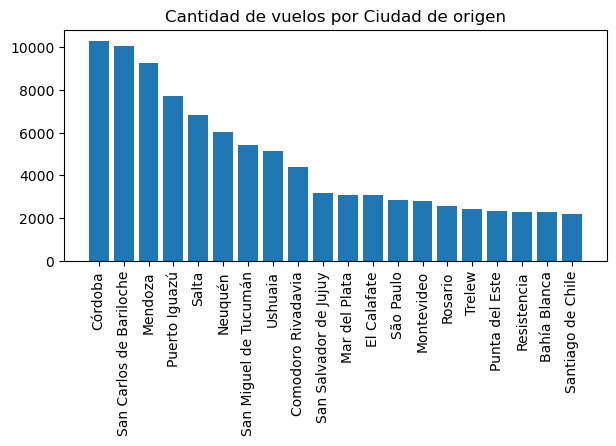

In [35]:
plot_vuelos_por_variable(df, "Ciudad_Aeropuerto",20,variable_titulo = "Ciudad de origen")

 ### e) Durante un año, que cabecera es la que más se utilizó? ¿y que posición?

Decidimos analizarlo usando todo el df y no solo un año

In [36]:
frecuencia_columna(df, 'Cabecera_Arribo')
#frecuencia_columna(df[df['Año_Vuelo']== 2019], 'Cabecera_Arribo')

Máximo a mostrar  20
  Cabecera_Arribo  cantidad  porcentaje
0            13.0     92500   73.656466
1            31.0     33083   26.343534
2           Total    125583  100.000000


Se utilizó más la cabecera 13 que la 31

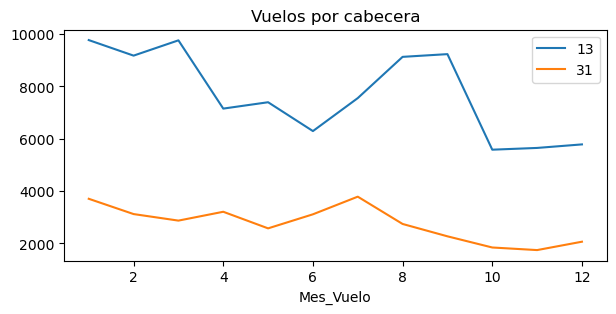

In [37]:
df[df['Cabecera_Arribo'] == 13.0].groupby(df['Mes_Vuelo']).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))
df[df['Cabecera_Arribo'] == 31.0].groupby(df['Mes_Vuelo']).Nombre_Aerolinea.count().plot(kind='line', figsize=(7, 3))

plt.title('Vuelos por cabecera')
plt.legend(['13', '31'])
plt.show()

Y en una distribución similar a lo largo del año en toda la base de datos

In [38]:
frecuencia_columna(df, 'Posicion_Arribo')

Máximo a mostrar  20
   Posicion_Arribo  cantidad  porcentaje
0                7      6081    4.842216
1                9      5947    4.735514
2                8      5918    4.712421
3                6      5908    4.704458
4                5      5339    4.251372
5               10      5263    4.190854
6               12      5145    4.096892
7               11      5131    4.085744
8               67      4045    3.220977
9               18      4012    3.194700
10              17      3809    3.033054
11               3      3739    2.977314
12              68      3418    2.721706
13               4      3382    2.693040
14              13      3210    2.556078
15              29      3151    2.509098
16               1      3136    2.497153
17              28      3128    2.490783
18              19      3126    2.489190
19              30      2998    2.387266


En cambio en la posición de arribo tenemos muchas más etiquetas

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\452591227.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vuelos_por_variable.index, rotation=90)


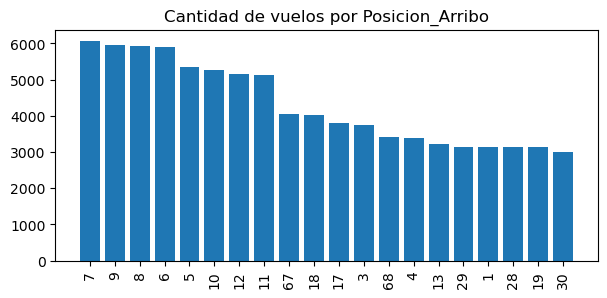

In [39]:
plot_vuelos_por_variable(df, "Posicion_Arribo",20)

### Extra: vuelos por aerolínea



In [40]:
df['Nombre_Aerolinea'].unique()

array(['DN', '4M', 'AR', 'AU', 'A0', 'G3', 'Z7', 'OY', 'PRV', 'LA', 'ZP',
       'FQ', 'AJ', 'WJ', 'FAA', 'USF', 'FO', '5U', 'JA', 'H2', 'LP', 'VH',
       'H8'], dtype=object)

Traemos información del nombre completo de la aerolínea que consideramos más representativo que el código.

In [41]:
Link_Aerolineas = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Aerolineas.csv'
Aerolineas_df = pd.read_csv(Link_Aerolineas)#, sep=',')
Aerolineas_df[:5]

Nombre_Aerolinea Nombre_Aerolinea_Completo
0               DN           Delta Air Lines
1               FO                  Flybondi
2               G3         Gol Linhas Aereas
3               AR     Aerolineas Argentinas
4               4M             LAN Argentina

In [42]:
df = pd.merge(df, Aerolineas_df, left_on='Nombre_Aerolinea', right_on='Nombre_Aerolinea')
df

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0                    DN         6049        IGR 2019-01-01 01:50:00   
1                    DN         6021        COR 2019-01-01 08:45:00   
2                    DN         6023        COR 2019-01-01 10:40:00   
3                    DN         6063        MDZ 2019-01-01 11:10:00   
4                    DN         6001        BRC 2019-01-01 15:05:00   
...                 ...          ...        ...                 ...   
125578               VH          329        BOG 2022-07-15 03:06:00   
125579               VH          299        MDE 2022-07-15 05:02:00   
125580               VH          329        BOG 2022-08-26 03:06:00   
125581               H8         5571        LIM 2022-07-21 07:15:00   
125582               H8         5571        LIM 2022-08-01 07:15:00   

       Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo  \
0          2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P   
1          2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P   
2          2019-01-01 10:31:00   2019-01-01 10:31:00      1 C P   
3          2019-01-01 11:02:00   2019-01-01 11:02:00      1 C P   
4          2019-01-01 14:50:00   2019-01-01 14:48:00      1 C P   
...                        ...                   ...        ...   
125578     2022-07-15 03:29:00   2022-07-15 03:29:00      1 I P   
125579     2022-07-15 04:50:00   2022-07-15 04:50:00      1 I P   
125580     2022-08-26 03:25:00   2022-08-26 03:25:00      1 I P   
125581     2022-07-21 08:06:00   2022-07-21 08:06:00      1 I P   
125582     2022-08-01 07:48:00   2022-08-01 07:48:00      1 I P   

       Posicion_Arribo Terminal_Arribo Sector  Cinta_Equipajes  \
0                   31               A      2                8   
1                   31               A      2                9   
2                    8               A      2                9   
3                   30               A      2                8   
4                   17               A      2                7   
...                ...             ...    ...              ...   
125578              27               A      I                2   
125579              18               A      I                2   
125580              68               A      I                3   
125581              28               A      N                0   
125582              31               A      N                1   

        Cant_Pasajeros Matricula_Aeronave Tipo_Aeronave  \
0                100.0              LVHQH           738   
1                 44.0              LVISQ          738W   
2                131.0              LVIQZ          738W   
3                 71.0              LVHQH           738   
4                174.0              LVISQ          738W   
...                ...                ...           ...   
125578           118.0             HK5360          320N   
125579           122.0             HK5352          320N   
125580           111.0             HK5388          320N   
125581           149.0              CCAZT          320N   
125582           147.0              CCAZR          320N   

       Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  Año_Vuelo  \
0                            DN          6062             31.0       2019   
1                            DN          6000             13.0       2019   
2                            DN          6064             13.0       2019   
3                            DN          6084             13.0       2019   
4                            DN          6024             13.0       2019   
...                         ...           ...              ...        ...   
125578                       VH         HK536             31.0       2022   
125579                       VH         HK535             31.0       2022   
125580                       VH           329             13.0       2022   
125581                       H2         5571A             31.0       2022   


In [43]:
frecuencia_columna(df, 'Nombre_Aerolinea_Completo')

Máximo a mostrar  20
   Nombre_Aerolinea_Completo  cantidad  porcentaje
0      Aerolineas Argentinas     64401   51.281623
1      Austral Lineas Aereas     18162   14.462149
2          Privaira Aviation      9722    7.741494
3              LAN Argentina      9563    7.614884
4               Air Labrador      6050    4.817531
5                   Flybondi      5484    4.366833
6            Delta Air Lines      4691    3.735378
7     Omni Air International      1690    1.345724
8             LATAM Airlines      1423    1.133115
9          Gol Linhas Aereas      1000    0.796286
10             Aztec Airways       743    0.591641
11         Avianca Argentina       654    0.520771
12                    ZanAir       450    0.358329
13         Silk Way Airlines       425    0.338422
14      Thomas Cook Airlines       361    0.287459
15              B&H Airlines       276    0.219775
16               Sky Airline       232    0.184738
17              TAG Airlines       177    0.140943
18        

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\452591227.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vuelos_por_variable.index, rotation=90)


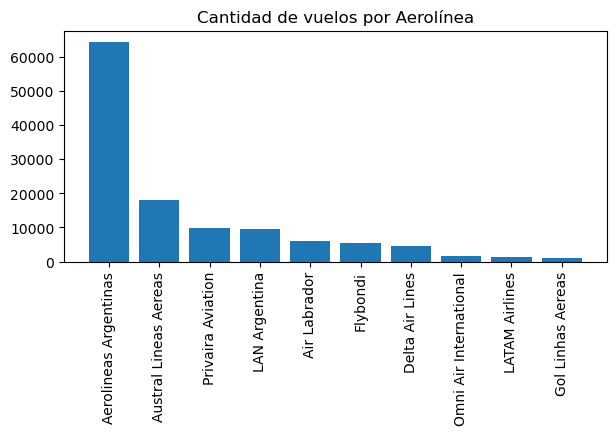

In [44]:
plot_vuelos_por_variable(df, "Nombre_Aerolinea_Completo",10, variable_titulo= "Aerolínea")

### Extra Análisis de feriados

In [45]:
Link_Feriados = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Feriados.csv'
Feriados_df = pd.read_csv(Link_Feriados, sep=';')
Feriados_df = Feriados_df.iloc[:, :-3]
Feriados_df.Fecha = pd.to_datetime(Feriados_df.Fecha)
Feriados_df

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\1259758698.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Feriados_df.Fecha = pd.to_datetime(Feriados_df.Fecha)


Fecha  Feriado_Codigo  Cant_Feriados  Pre_Feriado_3  Post_Feriado_3  \
0    2018-12-31               0              0              0               0   
1    2019-01-01               1              1              0               0   
2    2019-02-01               0              0              0               0   
3    2019-03-01               0              0              0               0   
4    2019-04-01               0              0              0               0   
...         ...             ...            ...            ...             ...   
1457 2022-12-27               0              0              0               0   
1458 2022-12-28               0              0              0               0   
1459 2022-12-29               0              0              0               0   
1460 2022-12-30               0              0              0               0   
1461 2022-12-31               0              0              0               0   

      Pre_Feriado_4  Post_Feriado_4  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
1457              0               0  
1458              0               0  
1459              0               0  
1460              0               0  
1461              0               0  

[1462 rows x 7 columns]

En esta base de datos de feriados tenemos
Fecha: contiene el día

Feriado_Codigo: 1 si es feriado, 0 si no lo es

Cant_Feriados: 0 si es día laboral, 1 si es feriado aislado, 2 si son 2 feriados juntos pero que no enganchan con el fin de semana, 3 si es un feriado previo o postrior a fin de semana (lunes o viernes), o sabad o domingo incluido en el finde largo de 3 días y 4 similar al 3 pero con finde largo de 4 días.

Pre_feriado_3: los días previos a un feriado de un finde largo de 3 días van a tener un uno, los que no, un 0

Post_feriado_3: los días posteriores a un feriado de un finde largo de 3 días van a tener un uno, los que no, un 0

De manera similar se generan Pre_feriado_4 y Post_feriado_4

In [46]:
Feriados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           1462 non-null   datetime64[ns]
 1   Feriado_Codigo  1462 non-null   int64         
 2   Cant_Feriados   1462 non-null   int64         
 3   Pre_Feriado_3   1462 non-null   int64         
 4   Post_Feriado_3  1462 non-null   int64         
 5   Pre_Feriado_4   1462 non-null   int64         
 6   Post_Feriado_4  1462 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 80.1 KB


Debemos tener una columna solo con la fecha en nuestro df para poder hacer el merge

In [47]:
df['Fecha_Arribo'] = df['Horario_Actual_Arribo'].dt.date
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo'])

In [48]:
df = pd.merge(df, Feriados_df, left_on='Fecha_Arribo', right_on='Fecha')
df = df.drop('Fecha', axis=1)
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6021        COR 2019-01-01 08:45:00   
2               DN         6023        COR 2019-01-01 10:40:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P              31   
2     2019-01-01 10:31:00   2019-01-01 10:31:00      1 C P               8   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                9            44.0              LVISQ   
2               A      2                9           131.0              LVIQZ   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1          738W                       DN          6000             13.0   
2          738W                       DN          6064             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           8       Argentina           Córdoba   
2       2019          1          10       Argentina           Córdoba   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   189.0   
2            -31.3133             -64.2085                   189.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada Mes_Dia  \
0  Transporte de pasajeros    Tuesday  01:50:00              1   01-01   
1  Transporte de pasajeros    Tuesday  08:45:00              8   01-01   
2  Transporte de pasajeros    Tuesday  10:40:00             10   01-01   

  Nombre_Aerolinea_Completo Fecha_Arribo  Feriado_Codigo  Cant_Feriados  \
0           Delta Air Lines   2019-01-01               1              1   
1           Delta Air Lines   2019-01-01               1              1   
2           Delta Air Lines   2019-01-01               1              1   

   Pre_Feriado_3  Post_Feriado_3  Pre_Feriado_4  Post_Feriado_4  
0              0               0              0               0  
1              0               0              0               0  
2              0               0              0               0

In [49]:
def plot_promedio(df, Vuelos_o_Pasajeros, Dividir_por, Agrupar_por):

  # Calcular el promedio de vuelos en días con 1 y dias con 0
  promedio_vuelos_no_feriado = df[df[Dividir_por] == 0].groupby(Agrupar_por).size().mean()
  promedio_vuelos_feriado = df[df[Dividir_por] == 1].groupby(Agrupar_por).size().mean()

  # Graficar el resultado
  plt.bar([0,1], [promedio_vuelos_no_feriado, promedio_vuelos_feriado])
  plt.xlabel(Dividir_por)
  plt.ylabel('Promedio de vuelos')
  plt.title('Promedio de vuelos por '+ Agrupar_por)
  plt.show()

In [50]:
Feriados_df.columns

Index(['Fecha', 'Feriado_Codigo', 'Cant_Feriados', 'Pre_Feriado_3',
       'Post_Feriado_3', 'Pre_Feriado_4', 'Post_Feriado_4'],
      dtype='object')

In [51]:
cols_feriados = ['Feriado_Codigo',  'Pre_Feriado_3',
       'Post_Feriado_3', 'Pre_Feriado_4', 'Post_Feriado_4']

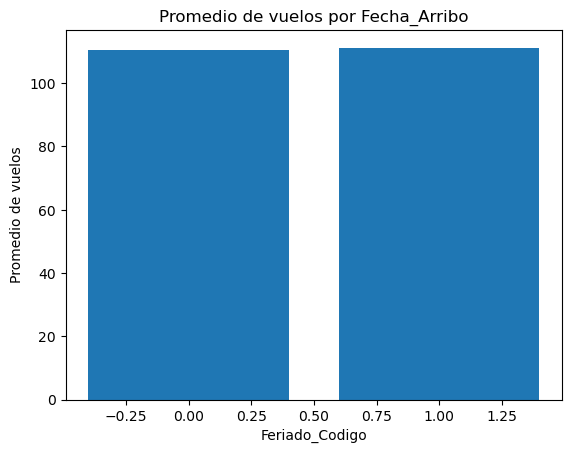

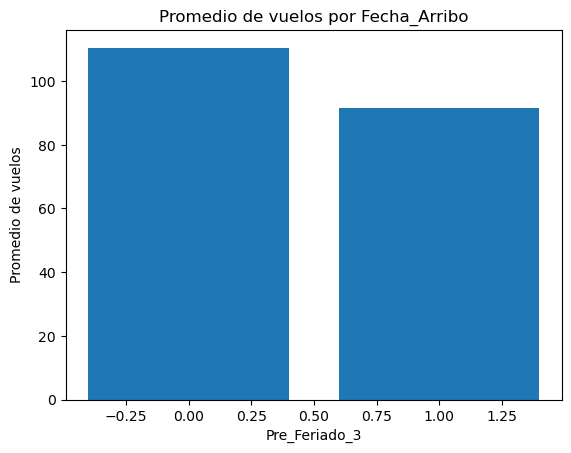

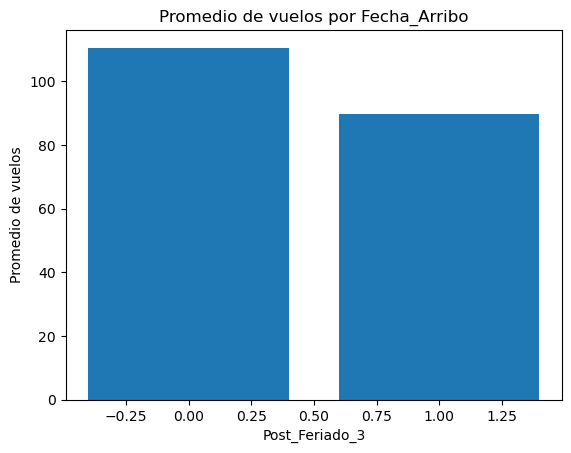

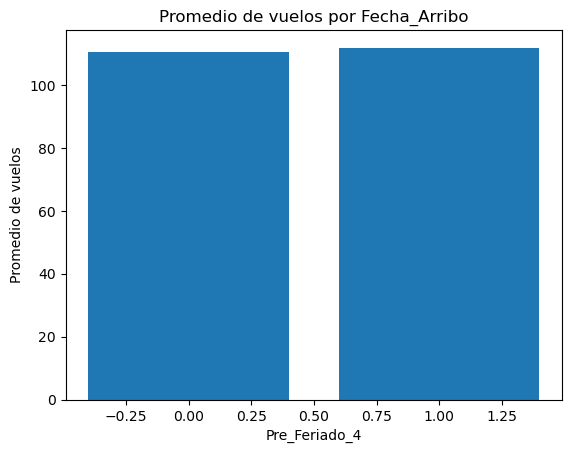

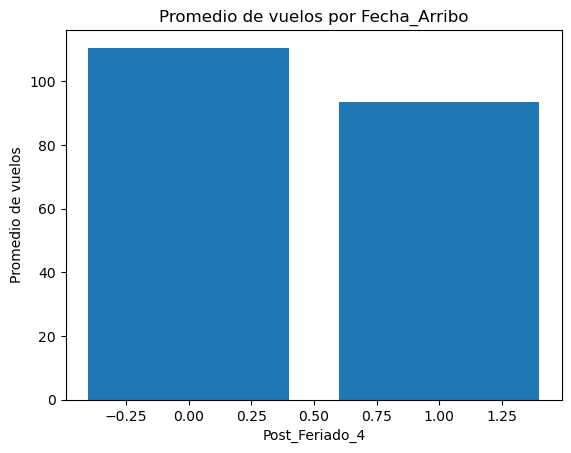

In [52]:
for col_feriado in cols_feriados:
#for tipo_grafico in ["Vuelos","Pasajeros"]
  #plot_promedio(df[df['Año_Vuelo']==2019],"Vuelos", col_feriado, "Fecha_Arribo")
  plot_promedio(df,"Vuelos", col_feriado, "Fecha_Arribo")
#PROMEDIO DE VUELOS POR DÍA:

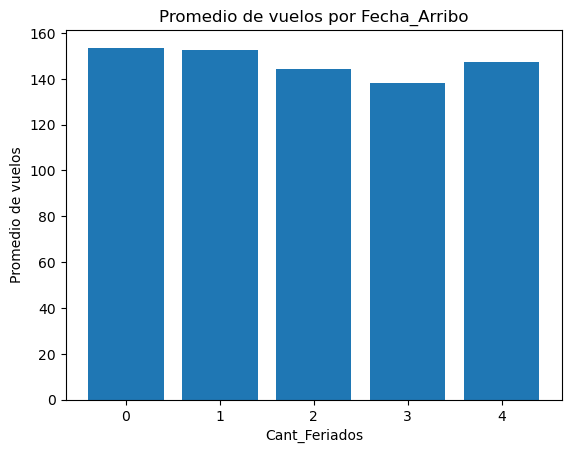

In [53]:
def plt_cant_feriados(df):
#Calcular el promedio de vuelos en días con 1 y dias con 0
  promedio_cant_fer_0 = df[df["Cant_Feriados"] == 0].groupby("Fecha_Arribo").size().mean()
  promedio_cant_fer_1 = df[df["Cant_Feriados"] == 1].groupby("Fecha_Arribo").size().mean()
  promedio_cant_fer_2 = df[df["Cant_Feriados"] == 2].groupby("Fecha_Arribo").size().mean()
  promedio_cant_fer_3 = df[df["Cant_Feriados"] == 3].groupby("Fecha_Arribo").size().mean()
  promedio_cant_fer_4 = df[df["Cant_Feriados"] == 4].groupby("Fecha_Arribo").size().mean()

  # Graficar el resultado
  plt.bar([0,1,2,3,4], [promedio_cant_fer_0, promedio_cant_fer_1,promedio_cant_fer_2,promedio_cant_fer_3,promedio_cant_fer_4])
  plt.xlabel("Cant_Feriados")
  plt.ylabel('Promedio de vuelos')
  plt.title('Promedio de vuelos por '+ "Fecha_Arribo")
  plt.show()

df_2019 = df[df["Año_Vuelo"]==2019]
plt_cant_feriados(df_2019) #PONEMOS 2019 SOLAMENTE PARA TENER UN AÑO COMPLETO Y SIN PANDEMIA YA QUE PUEDE AFECTAR MUCHO AL TEMA DE FERIADOS PORQUE SON POQUITOS DATOS

El promedio de vuelos por día en dias feriados, no parece ser una variable que influya en comparación a los días no feriados. El día previo a feriados de 4 días parece aumentar levemente, pero los previo y posterior a 3 días tienen un promedio más bajo. Los días de 3 feriados parecen incluso tener menos promedio que los días normales. Según estos análisis, no son variables significativas en la cantidad de vuelos.

### Extra: añadimos la distancia de cada Aeropuerto a Aeroparque:

In [54]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [55]:
from geopy.distance import geodesic
import plotly.express as px

#cálculo de distancias geodésica y ubicación en el planisferio

def distancia_geodesica( alat, alon):
  """
  Dados dos puntos en la superficie de la Tierra, se calcula la distancia
  geodésica entre ellos.

  Se introducen latitud (alat) y longitud (alon) del punto deseado y el nombre
  asignado al aeropuerto (anombre) y se calcula al distancia a Aeroparque.

  Las coordenadas deben ingresar y se las arma como tupla (tuples): (lat, lon)

  Se almacena el nombre para verificar si ya fue calculado para asignar la
  distancia al aeropuerto.

  Devuelve la distancia geodésica al punto ingresado expresada en kilómetros.
  """
  # ubicación geográfica del Aeroparque Jorge Newbery
  # src: https://nominatim.openstreetmap.org/ui/details.html?osmtype=R&osmid=4524923&class=aeroway
  AJN = (-34.5594401,-58.41438230065185)
  punto = (alat, alon)
  return geodesic(AJN, punto).km


def distancia(ddf):
  """
  Se introduce un DataFrame con las coordenadas y el índice corresponde al
  nombre del aeropuerto.

  Devuelve la distancia geodésica al aeropuerto desde Aeroparque JN.
  """
  adist = []
  for i, ubi in enumerate(ddf.index):
    adist.append( distancia_geodesica( ddf['Latitud_Aeropuerto'][i], ddf['Longitud_Aeropuerto'][i]) )
    #print(i, ddf.index[i], adist[i])
  return ddf.index, adist


# genero nuevo df temporal con Origen, lat y lon, agrupados por Origen
coord = df.groupby(['Ruta_Vuelo'])['Latitud_Aeropuerto', 'Longitud_Aeropuerto'].mean() # no interesa la operación que se le realice, ya que poseen el mismo valor. Con std vemos que es el mismo valor siempre

# ecesario para agregar al db porque se complica con el índice (que corresponde con el aeropuerto)
ubi = df.Ruta_Vuelo.unique() #.tolist()
ubi.sort()
coord['Ruta_Vuelo'] = ubi

# Se Calcula la distancia geodésica en km al aeropuerto
[_, distancia_AJN] = distancia(coord)
coord['dist'] = distancia_AJN


# gráfico
scatter1 = px.scatter_geo(coord, lon='Longitud_Aeropuerto', lat='Latitud_Aeropuerto', color=coord['dist'], color_continuous_scale='jet', opacity=0.9, labels={'color': 'distancia (km)'})
scatter1.update_geos(fitbounds="locations")  # Adjust the map bounds to fit the data
scatter1.show()

# Añadido de columna con distancias en km
dist_col = []
for i in range(len(df)): # lento, compara y recorre todo el dataset
  ia = np.where( coord.Ruta_Vuelo == df.Ruta_Vuelo[i] )[0][0]
  dist_col.append(coord.dist[ia])

df['dist'] = dist_col

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\635904064.py:43: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coord = df.groupby(['Ruta_Vuelo'])['Latitud_Aeropuerto', 'Longitud_Aeropuerto'].mean() # no interesa la operación que se le realice, ya que poseen el mismo valor. Con std vemos que es el mismo valor siempre


In [56]:
df = df.rename(columns={'dist': 'Distancia_km'})

In [57]:
df[0:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6021        COR 2019-01-01 08:45:00   
2               DN         6023        COR 2019-01-01 10:40:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P              31   
2     2019-01-01 10:31:00   2019-01-01 10:31:00      1 C P               8   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                9            44.0              LVISQ   
2               A      2                9           131.0              LVIQZ   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1          738W                       DN          6000             13.0   
2          738W                       DN          6064             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           8       Argentina           Córdoba   
2       2019          1          10       Argentina           Córdoba   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   189.0   
2            -31.3133             -64.2085                   189.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada Mes_Dia  \
0  Transporte de pasajeros    Tuesday  01:50:00              1   01-01   
1  Transporte de pasajeros    Tuesday  08:45:00              8   01-01   
2  Transporte de pasajeros    Tuesday  10:40:00             10   01-01   

  Nombre_Aerolinea_Completo Fecha_Arribo  Feriado_Codigo  Cant_Feriados  \
0           Delta Air Lines   2019-01-01               1              1   
1           Delta Air Lines   2019-01-01               1              1   
2           Delta Air Lines   2019-01-01               1              1   

   Pre_Feriado_3  Post_Feriado_3  Pre_Feriado_4  Post_Feriado_4  Distancia_km  
0              0               0              0               0   1048.834251  
1              0               0              0               0    650.364819  
2              0               0              0               0    650.364819

### Extra: añadimos datos de clima

Como la base de datos de clima la obtuvimos por hora, vamos a generar una columna con la fecha y hora pero sin minutos ni segundos:

In [58]:
df['Fecha_Hora_Prog'] = df['Horario_Prog_Arribo'].dt.round('H')
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6021        COR 2019-01-01 08:45:00   
2               DN         6023        COR 2019-01-01 10:40:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P              31   
2     2019-01-01 10:31:00   2019-01-01 10:31:00      1 C P               8   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                9            44.0              LVISQ   
2               A      2                9           131.0              LVIQZ   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1          738W                       DN          6000             13.0   
2          738W                       DN          6064             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           8       Argentina           Córdoba   
2       2019          1          10       Argentina           Córdoba   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   189.0   
2            -31.3133             -64.2085                   189.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada Mes_Dia  \
0  Transporte de pasajeros    Tuesday  01:50:00              1   01-01   
1  Transporte de pasajeros    Tuesday  08:45:00              8   01-01   
2  Transporte de pasajeros    Tuesday  10:40:00             10   01-01   

  Nombre_Aerolinea_Completo Fecha_Arribo  Feriado_Codigo  Cant_Feriados  \
0           Delta Air Lines   2019-01-01               1              1   
1           Delta Air Lines   2019-01-01               1              1   
2           Delta Air Lines   2019-01-01               1              1   

   Pre_Feriado_3  Post_Feriado_3  Pre_Feriado_4  Post_Feriado_4  Distancia_km  \
0              0               0              0               0   1048.834251   
1              0               0              0               0    650.364819   
2              0               0              0               0    650.364819   

      Fecha_Hora_Prog  
0 2019-01-01 02:00:00  
1 2019-01-01 09:00:00  
2 2019-01-01 11:00:00

La base de datos de clima fue proporcionada por el centro meteorológico nacional y cuenta con variables de vientos, lluvias, estado del tiempo y visibilidad agrupados por hora. A partir de ellos generamos 4 columnas a agregar al df. La primera es si el clima genera o no inconvenientes en aterrizajes ese día y a esa hora. Tomamos como criterio que afecta al aterrizaje si la visibilidad es menor a 700 mts (dado que encontramos información en internet de la visibilidad mínima para aterrizar en aeroparque hasta julio 2022 que era de 700 metros, posteriormente es de 300mts), y luego, de un gran listado de codigos de tiempo presente, decidimos que aquellos con tormentas o lluvias moderadas y fuertes, afectan el aterrizaje, el resto, no. Obviamente esto debería analizarse con un experto pero nosotros con nuestro leve conocimiento e investigación decidimos tomar ese criterio. Por otro lado, las otras 3 columnas nos dicen si hubo o no un clima que afecta el aterrizaje en las últimas 4, 8 y 12 horas. Contamos con únicamente 0s y 1s.

En cuanto al % de horas que cuentan con 1s en la columna de si afecta al clima a esta hora tenemos un 4%, en las últimas 4hs un 10%, 8hs 15% y 12hs 20% de horas afectadas.

<font color = "red"> La v2 considera el viento

In [59]:
Link_Clima1 = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Clima_Aeroparque.csv'
Clima_df1 = pd.read_csv(Link_Clima1, sep=';')
Clima_df1.Fecha_Hora = pd.to_datetime(Clima_df1.Fecha_Hora)
Clima_df1

Fecha_Hora  Riesgo_Vuelos_Ahora  Riesgo_Vuelos_Ult_4_hs  \
0     2019-01-01 00:00:00                    0                       0   
1     2019-01-01 01:00:00                    0                       0   
2     2019-01-01 02:00:00                    0                       0   
3     2019-01-01 03:00:00                    0                       0   
4     2019-01-01 04:00:00                    0                       0   
...                   ...                  ...                     ...   
39403 2023-06-30 19:00:00                    0                       0   
39404 2023-06-30 20:00:00                    0                       0   
39405 2023-06-30 21:00:00                    0                       0   
39406 2023-06-30 22:00:00                    0                       0   
39407 2023-06-30 23:00:00                    0                       0   

       Riesgo_Vuelos_Ult_8_hs  Riesgo_Vuelos_Ult_12_hs  
0                           0                        0  
1                           0                        0  
2                           0                        0  
3                           0                        0  
4                           0                        0  
...                       ...                      ...  
39403                       0                        0  
39404                       0                        0  
39405                       0                        0  
39406                       0                        0  
39407                       0                        0  

[39408 rows x 5 columns]

In [60]:
frecuencia_columna(Clima_df1,"Riesgo_Vuelos_Ahora")

Máximo a mostrar  20
  Riesgo_Vuelos_Ahora  cantidad  porcentaje
0                   0     37714    95.70138
1                   1      1694     4.29862
2               Total     39408   100.00000


In [61]:
Link_Clima = 'https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/Clima_Aeroparque_v2.csv'
Clima_df = pd.read_csv(Link_Clima, sep=',')
Clima_df.Fecha_Hora = pd.to_datetime(Clima_df.Fecha_Hora)
Clima_df

Fecha_Hora  Riesgo_Vuelos_Ahora  Riesgo_Vuelos_Ult_4_hs  \
0     2019-01-01 00:00:00                    0                       0   
1     2019-01-01 01:00:00                    0                       0   
2     2019-01-01 02:00:00                    0                       0   
3     2019-01-01 03:00:00                    0                       0   
4     2019-01-01 04:00:00                    0                       0   
...                   ...                  ...                     ...   
39403 2023-06-30 19:00:00                    0                       0   
39404 2023-06-30 20:00:00                    0                       0   
39405 2023-06-30 21:00:00                    0                       0   
39406 2023-06-30 22:00:00                    0                       0   
39407 2023-06-30 23:00:00                    0                       0   

       Riesgo_Vuelos_Ult_8_hs  Riesgo_Vuelos_Ult_12_hs  
0                           0                        0  
1                           0                        0  
2                           0                        0  
3                           0                        0  
4                           0                        0  
...                       ...                      ...  
39403                       0                        0  
39404                       0                        0  
39405                       0                        0  
39406                       0                        0  
39407                       0                        0  

[39408 rows x 5 columns]

In [62]:
frecuencia_columna(Clima_df,"Riesgo_Vuelos_Ahora")

Máximo a mostrar  20
  Riesgo_Vuelos_Ahora  cantidad  porcentaje
0                   0     37422   94.960414
1                   1      1986    5.039586
2               Total     39408  100.000000


In [63]:
df = pd.merge(df, Clima_df, left_on='Fecha_Hora_Prog', right_on='Fecha_Hora')
df = df.drop('Fecha_Hora_Prog', axis=1)
df = df.drop('Fecha_Hora', axis=1)
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6021        COR 2019-01-01 08:45:00   
2               4M         7603        COR 2019-01-01 09:07:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P              31   
2     2019-01-01 08:42:00   2019-01-01 08:44:00      1 C P              10   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                9            44.0              LVISQ   
2               A      2                7            81.0              LVCQS   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1          738W                       DN          6000             13.0   
2           320                       4M          7766             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           8       Argentina           Córdoba   
2       2019          1           9       Argentina           Córdoba   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   189.0   
2            -31.3133             -64.2085                   180.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada Mes_Dia  \
0  Transporte de pasajeros    Tuesday  01:50:00              1   01-01   
1  Transporte de pasajeros    Tuesday  08:45:00              8   01-01   
2  Transporte de pasajeros    Tuesday  09:07:00              9   01-01   

  Nombre_Aerolinea_Completo Fecha_Arribo  Feriado_Codigo  Cant_Feriados  \
0           Delta Air Lines   2019-01-01               1              1   
1           Delta Air Lines   2019-01-01               1              1   
2             LAN Argentina   2019-01-01               1              1   

   Pre_Feriado_3  Post_Feriado_3  Pre_Feriado_4  Post_Feriado_4  Distancia_km  \
0              0               0              0               0   1048.834251   
1              0               0              0               0    650.364819   
2              0               0              0               0    650.364819   

   Riesgo_Vuelos_Ahora  Riesgo_Vuelos_Ult_4_hs  Riesgo_Vuelos_Ult_8_hs  \
0                    0                       0                       0   
1                    0                       0                       0   
2                    0                       0                       0   

   Riesgo_Vuelos_Ult_12_hs  
0                        0  
1                        0  
2                        0

Posteriormente en la etapa de análisis de retrasos, analizaremos si alguna de estas variables demuestra cierta correlación con los retrasos

## 2) Traduciendo los retrasos

### a)  ¿Qué porcentaje de vuelos experimentan un retraso? Entre esos vuelos, ¿cuál fue el tiempo promedio de retraso (en minutos)?

Contamos como retraso (total) la diferencia entre el horario programado y el horario actual. Creamos dos nuevas columnas, una con los minutos de retraso y otra con 3 valores posibes, (-1) para los que llegaron  al menos 30 minutos antes del horario programado, (0) para los que llegaron entre 30 minutos antes y 30 minutos despues y (1) para los que llegaron al menos 30 minutos despues.


In [64]:
def generar_columna_retraso(df = df, Col_Retraso = "Retraso_Minutos",minutos_retraso = 30, Nueva_Col = "Retraso"):
  #minutos_retraso = 30

  conditions = [
      (df[Col_Retraso] < -minutos_retraso),
      (df[Col_Retraso] >= -minutos_retraso) & (df[Col_Retraso] <= minutos_retraso),
      (df[Col_Retraso] > minutos_retraso)
  ]
  values = [-1, 0, 1]
  print("Columna ", Nueva_Col, " creada a partir de la columna ", Col_Retraso)
  print("A un vuelo se lo considera adelantado o retrasado si supera el límite de +-", minutos_retraso, " de retraso o adelanto, de otra forma se lo considera en horario.")
  # Aplicar las condiciones y asignar los valores a una nueva columna
  df[Nueva_Col] = np.select(conditions, values, default=np.nan)
  print("Porcentaje de atrasos: ", round(len(df[df[Nueva_Col] == 1])/len(df)*100,1))
  print("Porcentaje de adelantos: ",round(len(df[df[Nueva_Col] == -1])/len(df)*100,1))
  print("Vuelos sin atrasos ni adelantos: ", round(len(df[df[Nueva_Col] == 0])/len(df)*100,1))
  print("De los vuelos con categoría Retrasado = 1 el promedio en minutos es:", round(df[df[Nueva_Col] == 1][Col_Retraso].mean(),2))
  print("De los vuelos con al menos 1 minuto de retraso el promedio en minutos es:", round(df[df[Col_Retraso]>=1][Col_Retraso].mean(),2))
  return

In [65]:
df['Retraso_Minutos'] = (df['Horario_Actual_Arribo'] - df["Horario_Prog_Arribo"]).dt.total_seconds() / 60
generar_columna_retraso()

Columna  Retraso  creada a partir de la columna  Retraso_Minutos
A un vuelo se lo considera adelantado o retrasado si supera el límite de +- 30  de retraso o adelanto, de otra forma se lo considera en horario.
Porcentaje de atrasos:  7.2
Porcentaje de adelantos:  3.4
Vuelos sin atrasos ni adelantos:  89.4
De los vuelos con categoría Retrasado = 1 el promedio en minutos es: 96.61
De los vuelos con al menos 1 minuto de retraso el promedio en minutos es: 34.97


De manera similar creamos las columnas de retraso de salida y de llegada en minutos y categorizada como retrasado, normal, adelantado, al igual que arriba.

El retraso en la salida es el horario estimado menos el programado:

In [66]:
df['Retraso_Salida_Minutos'] = (df['Horario_Estimado_Arribo'] - df["Horario_Prog_Arribo"]).dt.total_seconds() / 60
generar_columna_retraso(df = df, Col_Retraso = "Retraso_Salida_Minutos",minutos_retraso = 30, Nueva_Col = "Retraso_Salida")

Columna  Retraso_Salida  creada a partir de la columna  Retraso_Salida_Minutos
A un vuelo se lo considera adelantado o retrasado si supera el límite de +- 30  de retraso o adelanto, de otra forma se lo considera en horario.
Porcentaje de atrasos:  7.2
Porcentaje de adelantos:  2.8
Vuelos sin atrasos ni adelantos:  90.0
De los vuelos con categoría Retrasado = 1 el promedio en minutos es: 117.8
De los vuelos con al menos 1 minuto de retraso el promedio en minutos es: 43.28


In [67]:
df[:3]

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0               DN         6049        IGR 2019-01-01 01:50:00   
1               DN         6021        COR 2019-01-01 08:45:00   
2               4M         7603        COR 2019-01-01 09:07:00   

  Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo Posicion_Arribo  \
0     2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P              31   
1     2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P              31   
2     2019-01-01 08:42:00   2019-01-01 08:44:00      1 C P              10   

  Terminal_Arribo Sector  Cinta_Equipajes  Cant_Pasajeros Matricula_Aeronave  \
0               A      2                8           100.0              LVHQH   
1               A      2                9            44.0              LVISQ   
2               A      2                7            81.0              LVCQS   

  Tipo_Aeronave Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  \
0           738                       DN          6062             31.0   
1          738W                       DN          6000             13.0   
2           320                       4M          7766             13.0   

   Año_Vuelo  Mes_Vuelo  Hora_Vuelo Pais_Aeropuerto Ciudad_Aeropuerto  \
0       2019          1           1       Argentina     Puerto Iguazú   
1       2019          1           8       Argentina           Córdoba   
2       2019          1           9       Argentina           Córdoba   

   Latitud_Aeropuerto  Longitud_Aeropuerto  Capacidad_Max_Aeronave  \
0            -25.7373             -54.4731                   189.0   
1            -31.3133             -64.2085                   189.0   
2            -31.3133             -64.2085                   180.0   

              Uso_Aeronave Dia_Semana      Hora  Hora_Agrupada Mes_Dia  \
0  Transporte de pasajeros    Tuesday  01:50:00              1   01-01   
1  Transporte de pasajeros    Tuesday  08:45:00              8   01-01   
2  Transporte de pasajeros    Tuesday  09:07:00              9   01-01   

  Nombre_Aerolinea_Completo Fecha_Arribo  Feriado_Codigo  Cant_Feriados  \
0           Delta Air Lines   2019-01-01               1              1   
1           Delta Air Lines   2019-01-01               1              1   
2             LAN Argentina   2019-01-01               1              1   

   Pre_Feriado_3  Post_Feriado_3  Pre_Feriado_4  Post_Feriado_4  Distancia_km  \
0              0               0              0               0   1048.834251   
1              0               0              0               0    650.364819   
2              0               0              0               0    650.364819   

   Riesgo_Vuelos_Ahora  Riesgo_Vuelos_Ult_4_hs  Riesgo_Vuelos_Ult_8_hs  \
0                    0                       0                       0   
1                    0                       0                       0   
2                    0                       0                       0   

   Riesgo_Vuelos_Ult_12_hs  Retraso_Minutos  Retraso  Retraso_Salida_Minutos  \
0                        0            -28.0      0.0                   -28.0   
1                        0            -20.0      0.0                   -20.0   
2                        0            -23.0      0.0                   -25.0   

   Retraso_Salida  
0             0.0  
1             0.0  
2             0.0

In [68]:
df['Retraso_Llegada_Minutos'] = (df['Horario_Actual_Arribo'] - df["Horario_Estimado_Arribo"]).dt.total_seconds() / 60
generar_columna_retraso(df = df, Col_Retraso = "Retraso_Llegada_Minutos",minutos_retraso = 30, Nueva_Col = "Retraso_Llegada")

Columna  Retraso_Llegada  creada a partir de la columna  Retraso_Llegada_Minutos
A un vuelo se lo considera adelantado o retrasado si supera el límite de +- 30  de retraso o adelanto, de otra forma se lo considera en horario.
Porcentaje de atrasos:  0.2
Porcentaje de adelantos:  0.2
Vuelos sin atrasos ni adelantos:  99.6
De los vuelos con categoría Retrasado = 1 el promedio en minutos es: 1232.9
De los vuelos con al menos 1 minuto de retraso el promedio en minutos es: 10.01


In [69]:
df['Retraso_Minutos'] = df['Retraso_Minutos'].astype(int)
df['Retraso'] = df['Retraso'].astype(int)

Vemos claramente que la demora se encuentra en la salida, es decir, hay pocas demoras entre el actual y el estimado, pero muchas demoras entre el estimado y el programado. Lo mismo sucede con los adelantos (tener en cuenta que la suma de los % no da exacto el total, ya que consideramos el threshold de 30 minutos, que impacta en el recuento de cada uno).

<font color = "red"> Y todo esto que sigue lo tenemos en otra notebook (descartamos la parte de gráficos, solo dejamos los filtros de datos)

In [70]:
df

Nombre_Aerolinea Codigo_Vuelo Ruta_Vuelo Horario_Prog_Arribo  \
0                    DN         6049        IGR 2019-01-01 01:50:00   
1                    DN         6021        COR 2019-01-01 08:45:00   
2                    4M         7603        COR 2019-01-01 09:07:00   
3                    4M         7867        GRU 2019-01-01 09:10:00   
4                    AR         1403        MDZ 2019-01-01 08:35:00   
...                 ...          ...        ...                 ...   
125578              PRV          BAW        NQN 2020-07-30 19:21:00   
125579              PRV          CPC        MDZ 2020-07-31 06:37:00   
125580              PRV          CBU        MDZ 2020-07-31 07:42:00   
125581              PRV         PE01        UAQ 2020-07-31 08:24:00   
125582              PRV        380SE        PMI 2020-07-31 17:00:00   

       Horario_Estimado_Arribo Horario_Actual_Arribo Tipo_Vuelo  \
0          2019-01-01 01:22:00   2019-01-01 01:22:00      1 C P   
1          2019-01-01 08:25:00   2019-01-01 08:25:00      1 C P   
2          2019-01-01 08:42:00   2019-01-01 08:44:00      1 C P   
3          2019-01-01 08:45:00   2019-01-01 08:38:00      1 I P   
4          2019-01-01 08:18:00   2019-01-01 08:20:00      1 C P   
...                        ...                   ...        ...   
125578     2020-07-30 19:21:00   2020-07-30 19:21:00      2 C P   
125579     2020-07-31 06:37:00   2020-07-31 06:37:00      2 C T   
125580     2020-07-31 07:42:00   2020-07-31 07:42:00      2 C P   
125581     2020-07-31 08:24:00   2020-07-31 08:24:00     94 C T   
125582     2020-07-31 17:37:00   2020-07-31 17:37:00      8 I P   

       Posicion_Arribo Terminal_Arribo Sector  Cinta_Equipajes  \
0                   31               A      2                8   
1                   31               A      2                9   
2                   10               A      2                7   
3                    4               A      I                1   
4                    8               A      2                5   
...                ...             ...    ...              ...   
125578              52               A      N                0   
125579              52               A      2                0   
125580              52               A      N                0   
125581             121               A      2                0   
125582              51               A      N                0   

        Cant_Pasajeros Matricula_Aeronave Tipo_Aeronave  \
0                100.0              LVHQH           738   
1                 44.0              LVISQ          738W   
2                 81.0              LVCQS           320   
3                105.0              LVBSJ           320   
4                114.0              LVCXT          738W   
...                ...                ...           ...   
125578             2.0              LVBAW           L35   
125579             0.0              LVCPC           L60   
125580             2.0              LVCBU          C152   
125581             0.0               PE01           HEL   
125582             5.0             N380SE           GR6   

       Nombre_Aerolinea_Partida Vuelo_Partida  Cabecera_Arribo  Año_Vuelo  \
0                            DN          6062             31.0       2019   
1                            DN          6000             13.0       2019   
2                            4M          7766             13.0       2019   
3                            4M          7738             13.0       2019   
4                            AR          1680             13.0       2019   
...                         ...           ...              ...        ...   
125578                      PRV           BAW             13.0       2020   
125579                      PRV           CPC             13.0       2020   
125580                      PRV           CBU             13.0       2020   
125581                      PRV          PE01             13.0       2020   


In [71]:
df.to_csv("df_completo_sin_encoding_TP2.csv", index=False)
from IPython.display import FileLink
FileLink("df_completo_sin_encoding_TP2.csv")

C:\Users\franc\OneDrive\CV\2023\Portfolio\Data science\Flights delay prediction\df_completo_sin_encoding_TP2.csv

### b) ¿Cómo varía el % de vuelos retrasados a lo largo del año? ¿Se puede calcular el porcentaje de retraso según la estación del año?

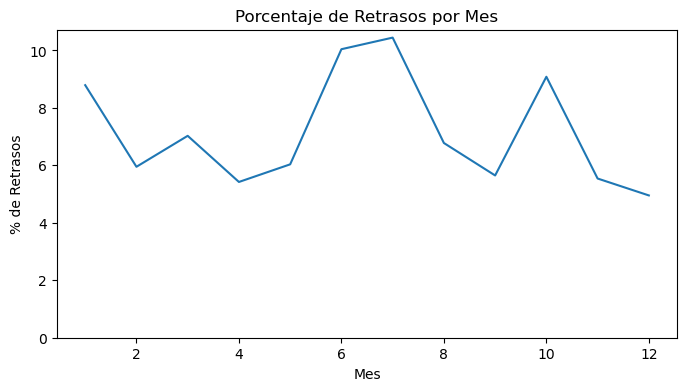

<Figure size 1200x600 with 0 Axes>

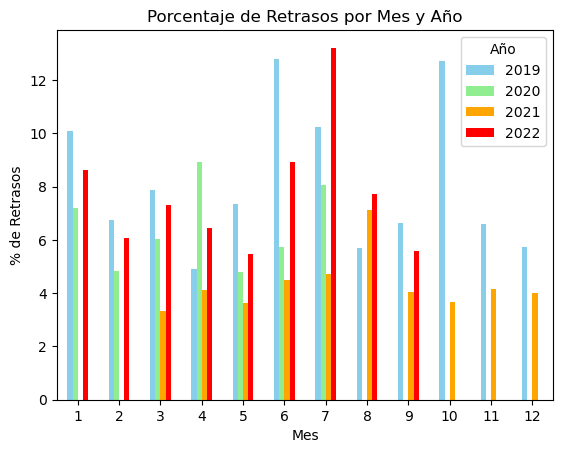

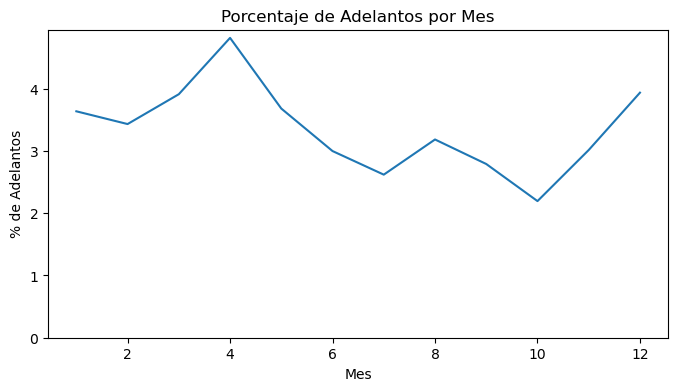

<Figure size 1200x600 with 0 Axes>

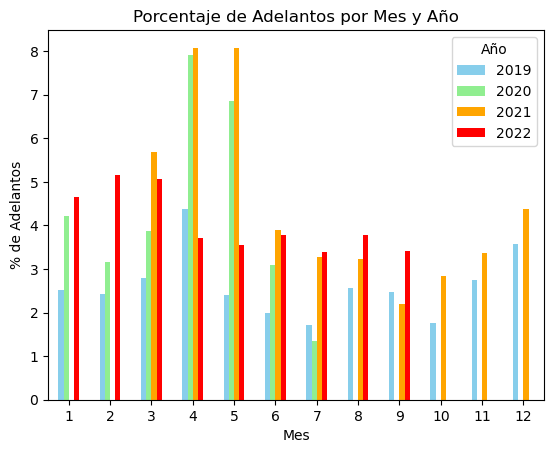

In [72]:
# Filtrar los retrasos y adelantos por separado
retrasos = df[df['Retraso'] == 1]
adelantos = df[df['Retraso'] == -1]

# Calcular el porcentaje de retrasos por mes
porcentaje_retrasos_total = retrasos.groupby('Mes_Vuelo').size() / df.groupby('Mes_Vuelo').size() * 100

# Calcular el porcentaje de retrasos por mes y separado por año
porcentaje_retrasos_por_año = retrasos.groupby(['Año_Vuelo', 'Mes_Vuelo']).size() / df.groupby(['Año_Vuelo', 'Mes_Vuelo']).size() * 100

# Calcular el porcentaje de adelantos por mes
porcentaje_adelantos_total = adelantos.groupby('Mes_Vuelo').size() / df.groupby('Mes_Vuelo').size() * 100

# Calcular el porcentaje de adelantos por mes y separado por año
porcentaje_adelantos_por_año = adelantos.groupby(['Año_Vuelo', 'Mes_Vuelo']).size() / df.groupby(['Año_Vuelo', 'Mes_Vuelo']).size() * 100

# Graficar el porcentaje de retrasos por mes
plt.figure(figsize=(8, 4))
porcentaje_retrasos_total.plot(kind='line')
plt.title('Porcentaje de Retrasos por Mes')
plt.xlabel('Mes')
plt.ylabel('% de Retrasos')
plt.xticks(rotation=0)
plt.ylim(0)
plt.show()

# Graficar el porcentaje de retrasos por mes y separado por año
plt.figure(figsize=(12, 6))
porcentaje_retrasos_por_año.unstack('Año_Vuelo').plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Porcentaje de Retrasos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('% de Retrasos')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

# Graficar el porcentaje de adelantos por mes
plt.figure(figsize=(8, 4))
porcentaje_adelantos_total.plot(kind='line')
plt.title('Porcentaje de Adelantos por Mes')
plt.xlabel('Mes')
plt.ylabel('% de Adelantos')
plt.xticks(rotation=0)
plt.ylim(0)
plt.show()

# Graficar el porcentaje de adelantos por mes y separado por año
plt.figure(figsize=(12, 6))
porcentaje_adelantos_por_año.unstack('Año_Vuelo').plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'red'])
plt.title('Porcentaje de Adelantos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('% de Adelantos')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

In [73]:
retrasos.columns

Index(['Nombre_Aerolinea', 'Codigo_Vuelo', 'Ruta_Vuelo', 'Horario_Prog_Arribo',
       'Horario_Estimado_Arribo', 'Horario_Actual_Arribo', 'Tipo_Vuelo',
       'Posicion_Arribo', 'Terminal_Arribo', 'Sector', 'Cinta_Equipajes',
       'Cant_Pasajeros', 'Matricula_Aeronave', 'Tipo_Aeronave',
       'Nombre_Aerolinea_Partida', 'Vuelo_Partida', 'Cabecera_Arribo',
       'Año_Vuelo', 'Mes_Vuelo', 'Hora_Vuelo', 'Pais_Aeropuerto',
       'Ciudad_Aeropuerto', 'Latitud_Aeropuerto', 'Longitud_Aeropuerto',
       'Capacidad_Max_Aeronave', 'Uso_Aeronave', 'Dia_Semana', 'Hora',
       'Hora_Agrupada', 'Mes_Dia', 'Nombre_Aerolinea_Completo', 'Fecha_Arribo',
       'Feriado_Codigo', 'Cant_Feriados', 'Pre_Feriado_3', 'Post_Feriado_3',
       'Pre_Feriado_4', 'Post_Feriado_4', 'Distancia_km',
       'Riesgo_Vuelos_Ahora', 'Riesgo_Vuelos_Ult_4_hs',
       'Riesgo_Vuelos_Ult_8_hs', 'Riesgo_Vuelos_Ult_12_hs', 'Retraso_Minutos',
       'Retraso', 'Retraso_Salida_Minutos', 'Retraso_Salida',
       'Retraso_

In [74]:
porcentaje_retrasos_por_hora = retrasos.groupby(['Dia_Semana']).size() / df.groupby(['Dia_Semana']).size() * 100
porcentaje_retrasos_por_hora

Dia_Semana
Monday       8.412329
Tuesday      6.748397
Wednesday    6.715968
Thursday     7.084977
Friday       8.126256
Saturday     7.301645
Sunday       5.774949
dtype: float64

Observamos más retrasos en junio, julio, octubre y enero, y más adelantos en abril, mayo y diciembre.

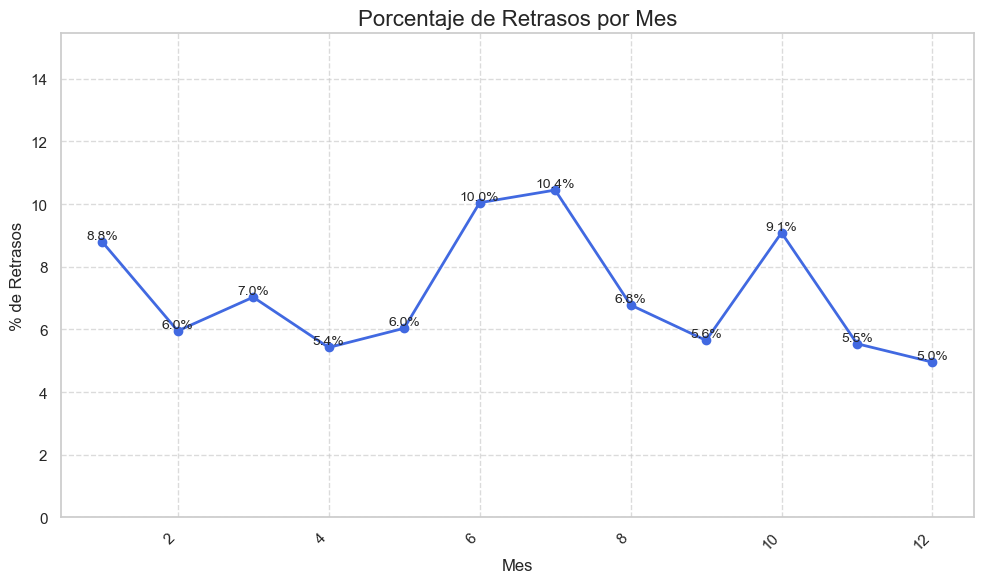

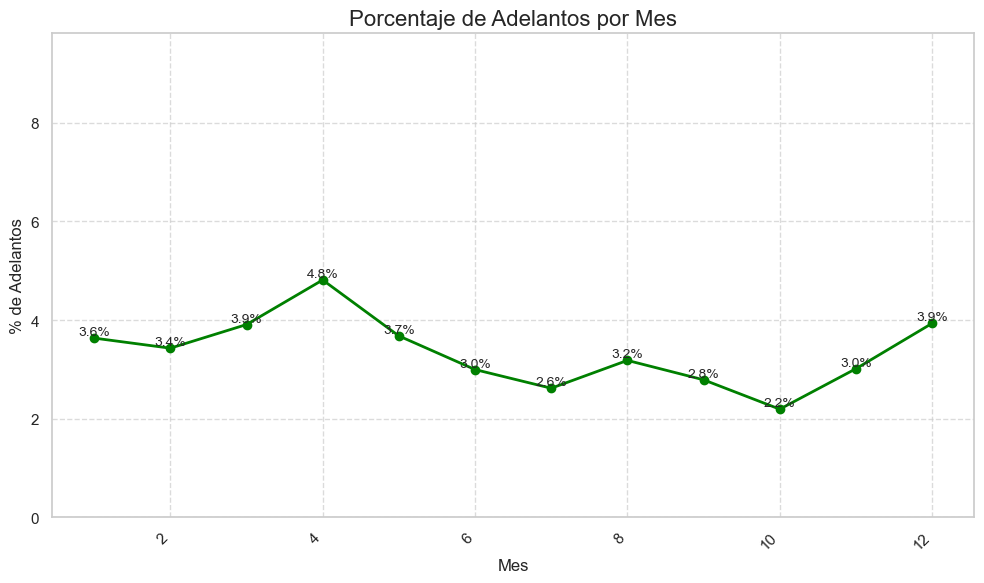

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn para hacer los gráficos más atractivos
sns.set(style='whitegrid')

# Graficar el porcentaje de retrasos por mes
plt.figure(figsize=(10, 6))
porcentaje_retrasos_total.plot(kind='line', marker='o', color='royalblue', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Porcentaje de Retrasos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('% de Retrasos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
plt.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
plt.ylim(0, max(porcentaje_retrasos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_retrasos_total.index, porcentaje_retrasos_total.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Graficar el porcentaje de adelantos por mes
plt.figure(figsize=(10, 6))
porcentaje_adelantos_total.plot(kind='line', marker='o', color='green', linewidth=2)

# Título y etiquetas de los ejes
plt.title('Porcentaje de Adelantos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('% de Adelantos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
plt.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
plt.ylim(0, max(porcentaje_adelantos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_adelantos_total.index, porcentaje_adelantos_total.values):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

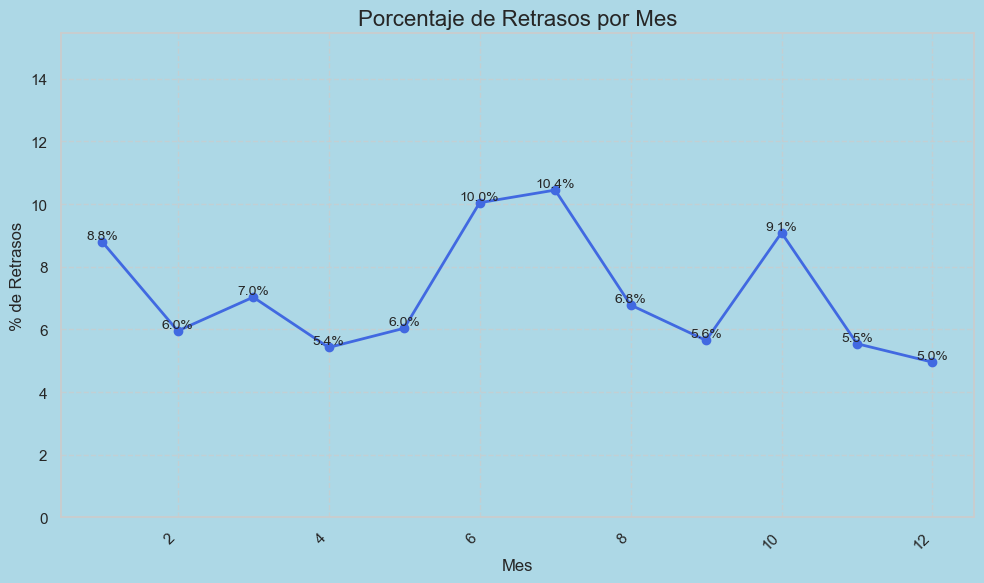

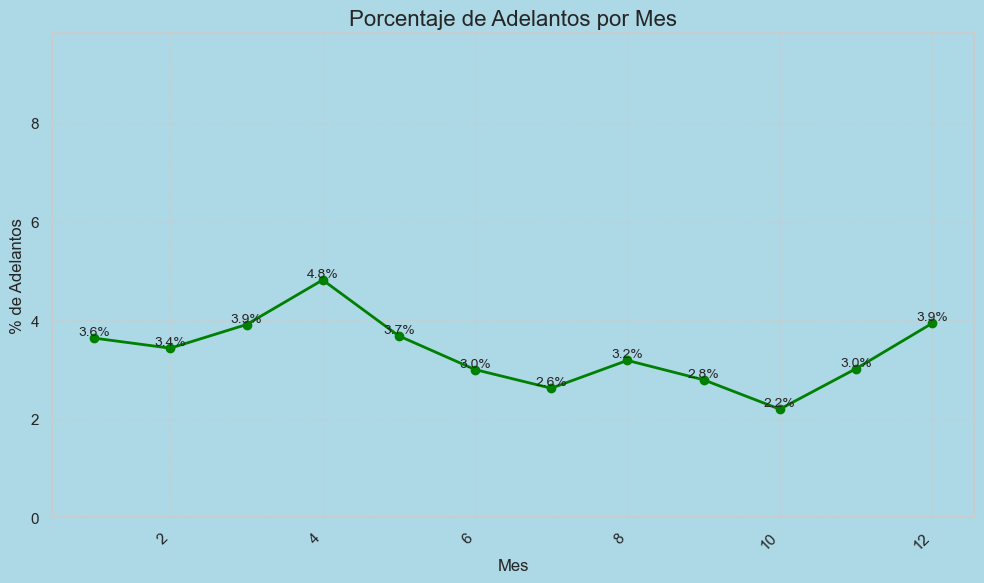

In [76]:
import numpy as np
import pylab as pl

# Configurar el estilo para tener fondo celeste
pl.rcParams['figure.facecolor'] = 'lightblue'
pl.rcParams['axes.facecolor'] = 'lightblue'

# Supongamos que tienes los porcentajes de retrasos y adelantos por mes en las variables 'porcentaje_retrasos_total' y 'porcentaje_adelantos_total'

# Graficar el porcentaje de retrasos por mes
pl.figure(figsize=(10, 6))
pl.plot(porcentaje_retrasos_total.index, porcentaje_retrasos_total.values, marker='o', color='royalblue', linewidth=2)

# Título y etiquetas de los ejes
pl.title('Porcentaje de Retrasos por Mes', fontsize=16)
pl.xlabel('Mes', fontsize=12)
pl.ylabel('% de Retrasos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
pl.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
pl.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
pl.ylim(0, np.max(porcentaje_retrasos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_retrasos_total.index, porcentaje_retrasos_total.values):
    pl.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
pl.tight_layout()
pl.show()

# Graficar el porcentaje de adelantos por mes
pl.figure(figsize=(10, 6))
pl.plot(porcentaje_adelantos_total.index, porcentaje_adelantos_total.values, marker='o', color='green', linewidth=2)

# Título y etiquetas de los ejes
pl.title('Porcentaje de Adelantos por Mes', fontsize=16)
pl.xlabel('Mes', fontsize=12)
pl.ylabel('% de Adelantos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
pl.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
pl.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
pl.ylim(0, np.max(porcentaje_adelantos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_adelantos_total.index, porcentaje_adelantos_total.values):
    pl.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
pl.tight_layout()
pl.show()


### c) ¿Hay zonas geográficas que tienden a presentar más demoras que otras? ¿Se pueden predecir demoras por ruta? (retrasos por lugar de origen)


Primero, generamos una función que va a graficar el % de retrasos de todas las categorías que presenten más de 1000 vuelos, ordenadas de mayor cantidad de vuelos a menor cantidad de vuelos:

In [77]:
import plotly.express as px

def generar_grafico_retrasos(df, variable, Col_Retraso="Retraso", Codigo_Retraso=1, Min_Vuelos=1000):
    # Calcular el porcentaje de vuelos retrasados por variable
    porcentaje_retrasos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable).size() / df.groupby(variable).size() * 100
    porcentaje_retrasos = porcentaje_retrasos.reset_index(name='Porcentaje_Retrasos')

    # Calcular la cantidad de vuelos por variable
    cantidad_vuelos = df.groupby(variable).size()
    cantidad_vuelos = cantidad_vuelos.reset_index(name='Cantidad_Vuelos')

    # Filtrar solo los atributos con cantidad de vuelos mayor a mil
    cantidad_vuelos = cantidad_vuelos[cantidad_vuelos['Cantidad_Vuelos'] > Min_Vuelos]

    # Calcular el promedio de retraso en minutos
    promedio_retraso_minutos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable)['Retraso_Minutos'].mean()
    promedio_retraso_minutos = promedio_retraso_minutos.reset_index(name='Promedio_Retraso_Minutos')

    # Combinar los datos de porcentaje de retrasos, cantidad de vuelos y promedio de retraso en minutos
    data = pd.merge(porcentaje_retrasos, cantidad_vuelos, on=variable)
    data = pd.merge(data, promedio_retraso_minutos, on=variable)

    # Ordenar por la cantidad de vuelos
    data = data.sort_values(by='Cantidad_Vuelos', ascending=False)

    if Codigo_Retraso == -1:
        titulo = "Porcentaje de vuelos adelantados por " + variable + " - Ordenados por cantidad"
        porc_titulo = "Porcentaje_Adelantos"
    else:
        titulo = "Porcentaje de vuelos retrasados por " + variable + " - Ordenados por cantidad"
        porc_titulo = "Porcentaje_Retrasos"

    # Crear el gráfico dinámico de barras con los porcentajes de retraso por variable ordenados por cantidad
    fig = px.bar(data, x=variable, y='Porcentaje_Retrasos',
                 title=titulo,
                 hover_data={'Cantidad_Vuelos': True, 'Porcentaje_Retrasos': ':.2f',
                             'Promedio_Retraso_Minutos': ':.2f'})

    # Agregar la leyenda del promedio de retraso en minutos a cada barra
    #fig.update_traces(text=data['Promedio_Retraso_Minutos'].round(2), textposition='outside')

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()


In [78]:
import plotly.express as px

def generar_grafico_retrasos_horizontal(df, variable, Col_Retraso="Retraso", Codigo_Retraso=1, Min_Vuelos=1000):
    # Calcular el porcentaje de vuelos retrasados por variable
    porcentaje_retrasos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable).size() / df.groupby(variable).size() * 100
    porcentaje_retrasos = porcentaje_retrasos.reset_index(name='Porcentaje_Retrasos')

    # Calcular la cantidad de vuelos por variable
    cantidad_vuelos = df.groupby(variable).size()
    cantidad_vuelos = cantidad_vuelos.reset_index(name='Cantidad_Vuelos')

    # Filtrar solo los atributos con cantidad de vuelos mayor a mil
    cantidad_vuelos = cantidad_vuelos[cantidad_vuelos['Cantidad_Vuelos'] > Min_Vuelos]

    # Calcular el promedio de retraso en minutos
    promedio_retraso_minutos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable)['Retraso_Minutos'].mean()
    promedio_retraso_minutos = promedio_retraso_minutos.reset_index(name='Promedio_Retraso_Minutos')

    # Combinar los datos de porcentaje de retrasos, cantidad de vuelos y promedio de retraso en minutos
    data = pd.merge(porcentaje_retrasos, cantidad_vuelos, on=variable)
    data = pd.merge(data, promedio_retraso_minutos, on=variable)

    # Ordenar por la cantidad de vuelos
    data = data.sort_values(by='Cantidad_Vuelos', ascending=False)

    if Codigo_Retraso == -1:
        titulo = "Porcentaje de vuelos adelantados por " + variable + " - Ordenados por cantidad"
        porc_titulo = "Porcentaje_Adelantos"
    else:
        titulo = "Porcentaje de vuelos retrasados por " + variable + " - Ordenados por cantidad"
        porc_titulo = "Porcentaje_Retrasos"

    # Crear el gráfico dinámico de barras con los porcentajes de retraso por variable ordenados por cantidad
    fig = px.bar(data, x='Porcentaje_Retrasos', y= variable ,
                 title=titulo,
                 hover_data={'Cantidad_Vuelos': True, 'Porcentaje_Retrasos': ':.2f',
                             'Promedio_Retraso_Minutos': ':.2f'})

    # Agregar la leyenda del promedio de retraso en minutos a cada barra
    #fig.update_traces(text=data['Promedio_Retraso_Minutos'].round(2), textposition='outside')

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()


In [79]:
variable = 'Nombre_Aerolinea_Completo'
generar_grafico_retrasos_horizontal(df, variable)

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def generar_grafico_retrasos_con_promedio(df, variable, Col_Retraso="Retraso", Codigo_Retraso=1, Min_Vuelos=1000):
    # Calcular el porcentaje de vuelos retrasados por variable
    porcentaje_retrasos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable).size() / df.groupby(variable).size() * 100
    porcentaje_retrasos = porcentaje_retrasos.reset_index(name='Porcentaje_Retrasos')

    # Calcular la cantidad de vuelos por variable
    cantidad_vuelos = df.groupby(variable).size()
    cantidad_vuelos = cantidad_vuelos.reset_index(name='Cantidad_Vuelos')

    # Filtrar solo los atributos con cantidad de vuelos mayor a mil
    cantidad_vuelos = cantidad_vuelos[cantidad_vuelos['Cantidad_Vuelos'] > Min_Vuelos]

    # Calcular el promedio de retraso en minutos
    promedio_retraso_minutos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable)['Retraso_Minutos'].mean()
    promedio_retraso_minutos = promedio_retraso_minutos.reset_index(name='Promedio_Retraso_Minutos')

    # Combinar los datos de porcentaje de retrasos, cantidad de vuelos y promedio de retraso en minutos
    data = pd.merge(porcentaje_retrasos, cantidad_vuelos, on=variable)
    data = pd.merge(data, promedio_retraso_minutos, on=variable)

    # Ordenar por la cantidad de vuelos
    data = data.sort_values(by='Cantidad_Vuelos', ascending=False)

    if Codigo_Retraso == -1:
        titulo = "Porcentaje de vuelos adelantados por " + variable + " - Ordenados por cantidad"
    else:
        titulo = "Porcentaje de vuelos retrasados por " + variable + " - Ordenados por cantidad"

    # Crear subplots con 2 ejes y títulos personalizados
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Calcular el ancho de las barras
    bar_width = 0.4

    # Convertir valores de la columna variable a cadenas
    x_values = [str(val) for val in data[variable]]

    # Agregar barras para el porcentaje de retrasos
    fig.add_trace(go.Bar(x=x_values, y=data['Porcentaje_Retrasos'], name='Porcentaje Retrasos (%)',
                         offsetgroup=1, width=bar_width,
                         hovertemplate='Porcentaje Retrasos: %{y:.2f}%<br>Cantidad Vuelos: %{customdata}',
                         customdata=data['Cantidad_Vuelos']),
                  secondary_y=False)

    # Agregar barras para el promedio de retraso en minutos
    fig.add_trace(go.Bar(x=x_values, y=data['Promedio_Retraso_Minutos'], name='Promedio Retraso (minutos)',
                         offsetgroup=2, width=bar_width,
                         hovertemplate='Promedio Retraso: %{y:.2f} minutos'),
                  secondary_y=True)

    # Ajustar la posición de las barras
    fig.update_traces(x=[i - bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(x=[i + bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=2))

    # Configurar diseño de los subplots
    fig.update_layout(title=titulo,
                      xaxis=dict(title=variable),
                      yaxis=dict(title='Porcentaje de Retrasos (%)'),
                      yaxis2=dict(title='Promedio Retraso (minutos)', overlaying='y', side='right'))

    fig.update_layout(xaxis_tickangle=-45)

    # Configurar la leyenda al pasar el mouse sobre las barras
    fig.update_traces(hovertemplate=None, selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(hovertemplate='%{hovertext}', selector=dict(type='bar', offsetgroup=2))

    # Agregar texto de cantidad de vuelos a la leyenda
    fig.add_trace(go.Scatter(x=[], y=[], mode='markers', hoverinfo='text', hovertext=[f"Cantidad Vuelos: {val}" for val in data['Cantidad_Vuelos']]), secondary_y=False)

    fig.show()


In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def generar_grafico_retrasos_con_promedio(df, variable, Col_Retraso="Retraso", Codigo_Retraso=1, Min_Vuelos=1000):
    # Calcular el porcentaje de vuelos retrasados por variable
    porcentaje_retrasos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable).size() / df.groupby(variable).size() * 100
    porcentaje_retrasos = porcentaje_retrasos.reset_index(name='Porcentaje_Retrasos')

    # Calcular la cantidad de vuelos por variable
    cantidad_vuelos = df.groupby(variable).size()
    cantidad_vuelos = cantidad_vuelos.reset_index(name='Cantidad_Vuelos')

    # Filtrar solo los atributos con cantidad de vuelos mayor a mil
    cantidad_vuelos = cantidad_vuelos[cantidad_vuelos['Cantidad_Vuelos'] > Min_Vuelos]

    # Calcular el promedio de retraso en minutos
    promedio_retraso_minutos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable)['Retraso_Minutos'].mean()
    promedio_retraso_minutos = promedio_retraso_minutos.reset_index(name='Promedio_Retraso_Minutos')

    # Combinar los datos de porcentaje de retrasos, cantidad de vuelos y promedio de retraso en minutos
    data = pd.merge(porcentaje_retrasos, cantidad_vuelos, on=variable)
    data = pd.merge(data, promedio_retraso_minutos, on=variable)

    # Ordenar por la cantidad de vuelos
    data = data.sort_values(by='Cantidad_Vuelos', ascending=False)

    if Codigo_Retraso == -1:
        titulo = "Porcentaje de vuelos adelantados por " + variable + " - Ordenados por cantidad"
    else:
        titulo = "Porcentaje de vuelos retrasados por " + variable + " - Ordenados por cantidad"

    # Crear subplots con 2 ejes y títulos personalizados
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Calcular el ancho de las barras
    bar_width = 0.4

    # Convertir valores de la columna variable a cadenas
    x_values = [str(val) for val in data[variable]]

    # Agregar barras para el porcentaje de retrasos
    fig.add_trace(go.Bar(x=x_values, y=data['Porcentaje_Retrasos'], name='Porcentaje Retrasos (%)',
                         offsetgroup=1, width=bar_width,
                         hovertemplate='Porcentaje Retrasos: %{y:.2f}%<br>Cantidad Vuelos: %{customdata}',
                         customdata=data['Cantidad_Vuelos']),
                  secondary_y=False)

    # Agregar barras para el promedio de retraso en minutos
    fig.add_trace(go.Bar(x=x_values, y=data['Promedio_Retraso_Minutos'], name='Promedio Retraso (minutos)',
                         offsetgroup=2, width=bar_width,
                         hovertemplate='Promedio Retraso: %{y:.2f} minutos'),
                  secondary_y=True)

    # Ajustar la posición de las barras
    fig.update_traces(x=[i - bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(x=[i + bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=2))

    # Configurar diseño de los subplots
    fig.update_layout(title=titulo,
                      xaxis=dict(title=variable),
                      yaxis=dict(title='Porcentaje de Retrasos (%)'),
                      yaxis2=dict(title='Promedio Retraso (minutos)', overlaying='y', side='right'))

    fig.update_layout(xaxis_tickangle=-45)

    # Configurar la leyenda al pasar el mouse sobre las barras
    fig.update_traces(hovertemplate=None, selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(hovertemplate='%{hovertext}', selector=dict(type='bar', offsetgroup=2))

    # Agregar texto de cantidad de vuelos a la leyenda
    fig.add_trace(go.Scatter(x=[], y=[], mode='markers', hoverinfo='text', hovertext=[f"Cantidad Vuelos: {val}" for val in data['Cantidad_Vuelos']]), secondary_y=False)

    fig.show()

Para el país vamos a poner que pueda mostrar si tienen 500 o más, y no 1000, así muestra más países:

In [82]:
variable = "Pais_Aeropuerto"
generar_grafico_retrasos(df, variable, Min_Vuelos=500)

Notamos más demoras en vuelos provenientes de Argentina y Chile que del resto de los países, pero diferencias no muy significativas.

In [83]:
generar_grafico_retrasos(df, "Ciudad_Aeropuerto", Min_Vuelos = 1500)

In [84]:
frecuencia_columna(df[df['Ciudad_Aeropuerto']== "Buenos Aires"], "Cant_Pasajeros")
print("% sin pasajeros ", 1634/1745)

Máximo a mostrar  20
   Cant_Pasajeros  cantidad  porcentaje
0             0.0      1634   93.638968
1             4.0        12    0.687679
2             1.0        11    0.630372
3             2.0         9    0.515759
4             5.0         9    0.515759
5             3.0         7    0.401146
6             6.0         6    0.343840
7            60.0         3    0.171920
8            96.0         3    0.171920
9            76.0         2    0.114613
10          120.0         2    0.114613
11          164.0         2    0.114613
12          125.0         2    0.114613
13           14.0         2    0.114613
14           12.0         2    0.114613
15           15.0         2    0.114613
16           10.0         2    0.114613
17            7.0         2    0.114613
18          160.0         1    0.057307
19           42.0         1    0.057307
% sin pasajeros  0.9363896848137536


La mayoría de las ciudades tiene entre un 6 y un 8.5% de % de retrasos, pero para Buenos Aires tenemos el 27% de vuelos demorados, teniendo un 400% más de retrasos que el promedio del resto de las ciudades. De todos los vuelos desde BS AS, el 94% no tienen pasajeros <font color = "red"> --> Raro, preguntar si sería mejor sacarlo o tener alguna precaución/filtro.

Por otro lado, analizamos el % de retrasos de los vuelos sin pasajeros:

In [85]:
frecuencia_columna(df[df['Cant_Pasajeros'] == 0 ],"Retraso")

Máximo a mostrar  20
  Retraso  cantidad  porcentaje
0       0      5168   82.476859
1       1       715   11.410788
2      -1       383    6.112352
3   Total      6266  100.000000


Y notamos que tenemos 11.4%, un 56% más de retrasos que el total de los vuelos analizados.

### d) ¿Se puede identificar algún patrón relevante que origine demoras?

Un patron claro que encontramos es que en las vacaciones los vuelos tienen mas retrasos

In [86]:
df_vacations = df.loc[(df['Mes_Vuelo'].isin([1,6,7])) & (df['Retraso'] == 1) & (df["Año_Vuelo"] != "2020")]
df_no_vacations = df.loc[(df['Mes_Vuelo'].isin([2,3,4,5,8,9,10,11,12])) & (df['Retraso'] == 1) & (df["Año_Vuelo"] != "2020")]

In [87]:
delay_vacations = len(df_vacations)
delay_no_vacations = len(df_no_vacations)
total_vacations = len(df.loc[(df['Mes_Vuelo'].isin([1,6,7])) & (df["Año_Vuelo"] != "2020")])
total_no_vacations = len(df.loc[(df['Mes_Vuelo'].isin([2,3,4,5,8,9,10,11,12])) & (df["Año_Vuelo"] != "2020")])
perc_vacations = delay_vacations / total_vacations
perc_no_vacations = delay_no_vacations / total_no_vacations

In [88]:
print(perc_vacations)
print(perc_no_vacations)

0.09683355728223404
0.0625403671632968


In [89]:
round((round(perc_vacations / perc_no_vacations,2)-1)*100,2)

55.0

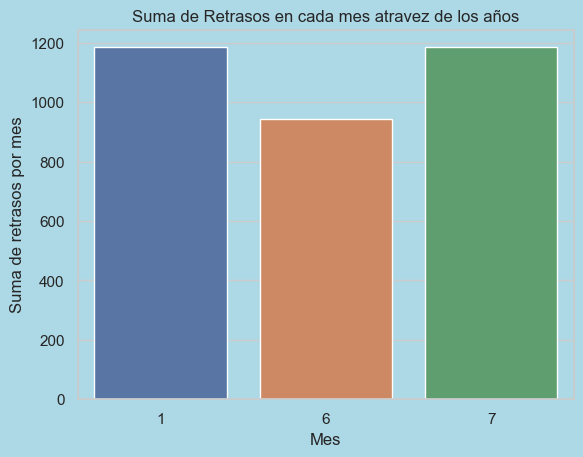

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
counts_vacations = df_vacations.groupby(['Mes_Vuelo'])['Retraso'].sum().reset_index()

# Step 4: Plot the data using a bar chart
sns.barplot(data=counts_vacations, x='Mes_Vuelo', y='Retraso')
plt.xlabel('Mes')
plt.ylabel('Suma de retrasos por mes')
plt.title('Suma de Retrasos en cada mes atravez de los años')
plt.show()

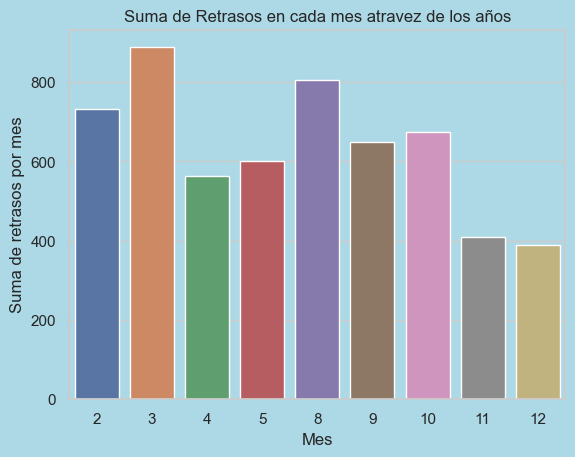

In [91]:
counts_no_vacations = df_no_vacations.groupby(['Mes_Vuelo'])['Retraso'].sum().reset_index()

# Step 4: Plot the data using a bar chart
sns.barplot(data=counts_no_vacations, x='Mes_Vuelo', y='Retraso')
plt.xlabel('Mes')
plt.ylabel('Suma de retrasos por mes')
plt.title('Suma de Retrasos en cada mes atravez de los años')
plt.show()

Es decir, en vacaciones encontramos un 38% más de demoras que en un mes fuera de los periodos vacacionales considerados que son enero, junio, julio y diciembre

### e) ¿Qué aerolíneas parecen ser más y menos confiables, en términos de salidas a tiempo?

Aquí, graficamos las aerolíneas ordenadas de mayor amenor en cantidad de vuelos, con su % de retrasos de salida:

In [92]:
generar_grafico_retrasos(df, "Nombre_Aerolinea_Completo", Col_Retraso = "Retraso_Salida", Min_Vuelos = 100)

### f) Ponderación del porcentaje de retraso por Aerolíneas según el número de vuelos que realizan (Aerolíneas con mayor porcentaje de retraso según el número de vuelos realizado vs. Aerolíneas con menor porcentaje de retraso según el número de vuelos realizado)

In [93]:
generar_grafico_retrasos(df, "Nombre_Aerolinea_Completo", Min_Vuelos = 100)

Definitivamente, parece que la aerolínea es un factor relevante en el % total de retrasos, ya que para algunas aerolíneas encontramos +20% retrasos, para otras +10%, otras pocas menos del 5%. Encontramos información similar al gráfico de Retrasos de Salida vs Retrasos ya que la mayoría son retrasos de salida.

### g) Discretizar el cumplimiento de las aerolíneas en: adelantado/cumplido/demorado

Arriba vemos el % de retrasos por aerolínea, ahora mostramos el % de adelantos por aerolínea:

In [94]:
generar_grafico_retrasos(df, "Nombre_Aerolinea_Completo", Codigo_Retraso = -1,Min_Vuelos = 100)

También observamos una gran variabilidad en los % de adelantos según la aerolínea.

Esto puede indicar que la aerolínea es un factor correlacionado al % de retrasos.

### Extra: relación de retrasos con otras variables:

In [95]:
df.columns

Index(['Nombre_Aerolinea', 'Codigo_Vuelo', 'Ruta_Vuelo', 'Horario_Prog_Arribo',
       'Horario_Estimado_Arribo', 'Horario_Actual_Arribo', 'Tipo_Vuelo',
       'Posicion_Arribo', 'Terminal_Arribo', 'Sector', 'Cinta_Equipajes',
       'Cant_Pasajeros', 'Matricula_Aeronave', 'Tipo_Aeronave',
       'Nombre_Aerolinea_Partida', 'Vuelo_Partida', 'Cabecera_Arribo',
       'Año_Vuelo', 'Mes_Vuelo', 'Hora_Vuelo', 'Pais_Aeropuerto',
       'Ciudad_Aeropuerto', 'Latitud_Aeropuerto', 'Longitud_Aeropuerto',
       'Capacidad_Max_Aeronave', 'Uso_Aeronave', 'Dia_Semana', 'Hora',
       'Hora_Agrupada', 'Mes_Dia', 'Nombre_Aerolinea_Completo', 'Fecha_Arribo',
       'Feriado_Codigo', 'Cant_Feriados', 'Pre_Feriado_3', 'Post_Feriado_3',
       'Pre_Feriado_4', 'Post_Feriado_4', 'Distancia_km',
       'Riesgo_Vuelos_Ahora', 'Riesgo_Vuelos_Ult_4_hs',
       'Riesgo_Vuelos_Ult_8_hs', 'Riesgo_Vuelos_Ult_12_hs', 'Retraso_Minutos',
       'Retraso', 'Retraso_Salida_Minutos', 'Retraso_Salida',
       'Retraso_

Hacer este de abajo pero viendo los días críticos de retrasos, algunos superan el 50% de retraso!! Osea ordenar por retraso y hacer el top 30 aprox asi se ve bien que dia fue

In [96]:
columnas = ['Tipo_Vuelo',
       'Posicion_Arribo', 'Terminal_Arribo', 'Sector',
       'Cinta_Equipajes', 'Cant_Pasajeros', 'Matricula_Aeronave',
       'Cabecera_Arribo', 'Año_Vuelo','Capacidad_Max_Aeronave', 'Uso_Aeronave',
       'Dia_Semana', 'Hora_Agrupada', 'Feriado_Codigo',
       'Cant_Feriados', 'Pre_Feriado_3', 'Post_Feriado_3', 'Pre_Feriado_4',
       'Post_Feriado_4', 'Distancia_km', 'Riesgo_Vuelos_Ahora',
       'Riesgo_Vuelos_Ult_4_hs', 'Riesgo_Vuelos_Ult_8_hs',
       'Riesgo_Vuelos_Ult_12_hs']
for columna in columnas:
    generar_grafico_retrasos(df, columna, Min_Vuelos =100)

Conclusiones de las relaciones de arriba:

Tipo_Vuelo 3CT y 4CP mucho retraso >15% 3k vuelos

Posición arribo 67, 68, 30, 31, aprox 10%, 13k datos ahí

Trminal B sin retrasos casi, 2k vuelos

Sector: sector I bastante menos retraso

Cinta equipajes 7,8 y 9 mas de 8.8% retrasos, 22k vuelos aprox

Cant pasajeros: 0 tiene 11%, mas de 172 pasajeros tienen más de 9%

Matr aeronave: nada

Cabecera arribo: nada

Año arribo: ok, se espera por la pandemia que haya menos problemas y menos demoras en 2020 y 2021

Cap max aeronave: nada

Vuelos privados poco retraso

Dia de semana: lunes y viernes un poco más de retraso que la media

Retrasos mayormente entre las 23 y la 3 AM, mucho retraso! El resto de las horas mas o menos uniforme

Feriados hay un 12.5% más de retrasos

Los findes con feriados de 3 días hay un claro aumento en los retrasos: 11.65% (60% encima del promedio). 3.5k vuelos

Post feriado 3 10% retrasos, 1.2k vuelos

Pre feriado 4 8.7% retrasos, 1.6k vuelos

Post feriado 4: 5.6% retrasos 1.2k vuelos

Distancia en principio no pero <font color = "red"> analizar más en detalles

Variable clima, riesgo vuelos ahora 13.2% retrasos 5.5k vuelos llegaron en esas condiciones climaticas. 80% encima del prom retrasos

Riesgo ult 4 hs: 12.6% retrasos 13k vuelos. 72% encima del prom retrasos

riesgo ult 8 hs: 11.9% retrasos 20k vuelos. 63% encima del prom retrasos

riesgo ult 12hs: 11.1% retrasos, 25k vuelos. 52% encima del prom restrasos.


Según este análisis, sería posible eliminar aquellas columnas que no encontramos correlación con el % de retrasos, como sector, matricula aeronave, cabecera arribo, cap. max. aeronave,

## 3)  Correlaciones

Verificar mediante una matriz de correlación la correlación entre cada variable y la columna target.

### a)  ¿Hay datos fuertemente correlacionados con los retrasos? ¿y si sumamos un dataset con información asociada al pronóstico (viento y precipitación) para obtener la imagen completa?


In [97]:
if activar_ydata_profiling == "Si":
#Generación del reporte a través de ydata-profiling para un primer análisis
  from ydata_profiling import ProfileReport
  profile = ProfileReport(df, title="Profiling Report")

In [98]:
if activar_ydata_profiling == "Si":
  profile.to_notebook_iframe()

In [99]:
# Abrir el informe en una ventana emergente
if activar_ydata_profiling == "Si":
  profile.to_widgets()

In [100]:
if activar_ydata_profiling == "Si":
  # Generar el informe de perfilado
  profile = ProfileReport(df, title="Profiling Report")

  # Guardar el informe en un archivo Excel o html
  profile.to_file("informe_perfilado.html")

In [101]:
if activar_ydata_profiling == "Si":
  from google.colab import files

  # Descargar el archivo HTML
  files.download("informe_perfilado.html")

Según el Ydata profiling, tenemos varios datos correlacionados entre ellos y pocos correlacionados con Retraso. Pero analizaremos de manera inversa: cuáles variables conviene mantener y cuales no? En primer lugar, haremos un listado con el top 15 de datos más correlacionados con la variable retraso:

In [102]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Obtener las correlaciones de la variable con el resto de las variables y ordenar por valor absoluto
correlations = correlation_matrix["Retraso"].abs().sort_values(ascending=False)

# Mostrar el top 20 con la mayor correlación
top_15_correlations = correlations.head(25)

print(top_15_correlations)

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\3662691183.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Retraso                    1.000000
Retraso_Salida             0.882824
Retraso_Minutos            0.631457
Retraso_Salida_Minutos     0.329818
Riesgo_Vuelos_Ult_8_hs     0.102662
Riesgo_Vuelos_Ult_12_hs    0.100735
Riesgo_Vuelos_Ult_4_hs     0.093298
Riesgo_Vuelos_Ahora        0.064550
Cant_Pasajeros             0.047961
Hora_Vuelo                 0.038139
Hora_Agrupada              0.038139
Cinta_Equipajes            0.034113
Año_Vuelo                  0.033830
Distancia_km               0.027930
Capacidad_Max_Aeronave     0.022580
Retraso_Llegada_Minutos    0.013843
Longitud_Aeropuerto        0.009628
Post_Feriado_3             0.008625
Latitud_Aeropuerto         0.007386
Cant_Feriados              0.004807
Cabecera_Arribo            0.004704
Retraso_Llegada            0.004263
Pre_Feriado_4              0.003466
Post_Feriado_4             0.002849
Feriado_Codigo             0.001743
Name: Retraso, dtype: float64


Sabemos que Retraso es lo que queremos predecir, y las 3 variables que siguen no las sabemos de antemano por lo que no van en el listado definitivo. Además, tenemos varias variables muy correlacionadas entre ellas, de las cuales dejamos solo aquella que tiene más correlación con Retraso:

In [103]:
# Filtrar columnas con correlación mayor a 0.3
filtered_columns = top_15_correlations[top_15_correlations < 0.65].index.tolist()
print(filtered_columns)

# Paso 1: Crea un DataFrame temporal con las variables seleccionadas
df_temp = df[filtered_columns]

# Paso 2: Calcula la matriz de correlación para las variables seleccionadas
correlation_matrix = df_temp.corr()

# Paso 3: Encuentra los pares de variables con correlación mayor a 0.5 y elimina la segunda variable del par
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.6:
            variable_i = correlation_matrix.columns[i]
            variable_j = correlation_matrix.columns[j]
            # Elimina la segunda variable del par con mayor correlación de la lista
            if variable_j in filtered_columns:
                filtered_columns.remove(variable_j)
                print(f"Se eliminó la variable '{variable_j}' debido a la correlación con '{variable_i}'.")

# La lista 'filtered_columns' ahora contiene las variables restantes después de eliminar las correlaciones mayores a 0.5,
# manteniendo siempre la primera variable de cada par
print(filtered_columns)

['Retraso_Minutos', 'Retraso_Salida_Minutos', 'Riesgo_Vuelos_Ult_8_hs', 'Riesgo_Vuelos_Ult_12_hs', 'Riesgo_Vuelos_Ult_4_hs', 'Riesgo_Vuelos_Ahora', 'Cant_Pasajeros', 'Hora_Vuelo', 'Hora_Agrupada', 'Cinta_Equipajes', 'Año_Vuelo', 'Distancia_km', 'Capacidad_Max_Aeronave', 'Retraso_Llegada_Minutos', 'Longitud_Aeropuerto', 'Post_Feriado_3', 'Latitud_Aeropuerto', 'Cant_Feriados', 'Cabecera_Arribo', 'Retraso_Llegada', 'Pre_Feriado_4', 'Post_Feriado_4', 'Feriado_Codigo']
Se eliminó la variable 'Riesgo_Vuelos_Ult_12_hs' debido a la correlación con 'Riesgo_Vuelos_Ult_8_hs'.
Se eliminó la variable 'Riesgo_Vuelos_Ult_4_hs' debido a la correlación con 'Riesgo_Vuelos_Ult_8_hs'.
Se eliminó la variable 'Riesgo_Vuelos_Ahora' debido a la correlación con 'Riesgo_Vuelos_Ult_4_hs'.
Se eliminó la variable 'Capacidad_Max_Aeronave' debido a la correlación con 'Cant_Pasajeros'.
Se eliminó la variable 'Hora_Agrupada' debido a la correlación con 'Hora_Vuelo'.
Se eliminó la variable 'Retraso_Llegada' debido a la

Además, eliminamos Año_Vuelo, ya que por la pandemia hubo muy pocos retrasos en el 2020 y 2021 y eso genera una alta correlación con Retrasos, que debería ser independiente en realidad. Sacamos también "Retraso_Llegada_Minutos"

In [104]:
sacar = ["Año_Vuelo",'Longitud_Aeropuerto', 'Post_Feriado_3', 'Latitud_Aeropuerto', 'Cant_Feriados','Pre_Feriado_4', 'Post_Feriado_4', 'Pre_Feriado_3',"Retraso_Minutos","Retraso_Salida_Minutos","Retraso_Llegada_Minutos"]
for i in sacar:
  try:
    filtered_columns.remove(i)
  except: continue
filtered_columns

['Riesgo_Vuelos_Ult_8_hs',
 'Cant_Pasajeros',
 'Hora_Vuelo',
 'Cinta_Equipajes',
 'Distancia_km',
 'Cabecera_Arribo']

Finalmente agregamos al listado las columnas Pais_Aeropuerto, Nombre_Aerolinea, Sector, Uso_Aeronave, Cinta_Equipajes, Terminal_Arribo, Dia_Semana que son variables que en el YDATA Profile vemos que tienen cierta correlación con Retraso, pero al ser categóricas no las calcula la correlation matrix acá.

También, agregamos Horario_Prog_Arribo y Retraso

In [105]:
agregar = ["Pais_Aeropuerto", "Ciudad_Aeropuerto", "Nombre_Aerolinea", "Sector", "Uso_Aeronave", "Cinta_Equipajes", "Terminal_Arribo", "Dia_Semana","Mes_Vuelo", "Horario_Prog_Arribo", "Retraso", "Retraso_Minutos"]

In [106]:
for i in agregar:
    if i not in filtered_columns:
       filtered_columns.append(i)

In [107]:
print(filtered_columns)
print("Tenemos" ,len(filtered_columns)-1, "variables y 1 target")

['Riesgo_Vuelos_Ult_8_hs', 'Cant_Pasajeros', 'Hora_Vuelo', 'Cinta_Equipajes', 'Distancia_km', 'Cabecera_Arribo', 'Pais_Aeropuerto', 'Ciudad_Aeropuerto', 'Nombre_Aerolinea', 'Sector', 'Uso_Aeronave', 'Terminal_Arribo', 'Dia_Semana', 'Mes_Vuelo', 'Horario_Prog_Arribo', 'Retraso', 'Retraso_Minutos']
Tenemos 16 variables y 1 target


### b) Eliminar las features fuertemente correlacionadas (una de cada par), ya que mantener columnas altamente correlacionadas, puede ocasionar un comportamiento no deseado en los modelos de clasificación.

Creamos el nuevo df con las columnas seleccionadas:

In [108]:
df_nuevo = df[filtered_columns]

In [109]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125583 entries, 0 to 125582
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Riesgo_Vuelos_Ult_8_hs  125583 non-null  int64         
 1   Cant_Pasajeros          125583 non-null  float64       
 2   Hora_Vuelo              125583 non-null  int64         
 3   Cinta_Equipajes         125583 non-null  int64         
 4   Distancia_km            125583 non-null  float64       
 5   Cabecera_Arribo         125583 non-null  float64       
 6   Pais_Aeropuerto         125583 non-null  object        
 7   Ciudad_Aeropuerto       125583 non-null  object        
 8   Nombre_Aerolinea        125583 non-null  object        
 9   Sector                  125583 non-null  object        
 10  Uso_Aeronave            125583 non-null  object        
 11  Terminal_Arribo         125583 non-null  object        
 12  Dia_Semana              125583

Cambiamos a int todo lo float:

In [110]:
df_nuevo['Cant_Pasajeros'] = df_nuevo['Cant_Pasajeros'].astype(int)
df_nuevo['Distancia_km'] = df_nuevo['Distancia_km'].astype(int)
df_nuevo['Cabecera_Arribo'] = df_nuevo['Cabecera_Arribo'].astype(int)

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\3286445725.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\3286445725.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\3286445725.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [111]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125583 entries, 0 to 125582
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Riesgo_Vuelos_Ult_8_hs  125583 non-null  int64         
 1   Cant_Pasajeros          125583 non-null  int32         
 2   Hora_Vuelo              125583 non-null  int64         
 3   Cinta_Equipajes         125583 non-null  int64         
 4   Distancia_km            125583 non-null  int32         
 5   Cabecera_Arribo         125583 non-null  int32         
 6   Pais_Aeropuerto         125583 non-null  object        
 7   Ciudad_Aeropuerto       125583 non-null  object        
 8   Nombre_Aerolinea        125583 non-null  object        
 9   Sector                  125583 non-null  object        
 10  Uso_Aeronave            125583 non-null  object        
 11  Terminal_Arribo         125583 non-null  object        
 12  Dia_Semana              125583

In [112]:
df_nuevo

Riesgo_Vuelos_Ult_8_hs  Cant_Pasajeros  Hora_Vuelo  Cinta_Equipajes  \
0                            0             100           1                8   
1                            0              44           8                9   
2                            0              81           9                7   
3                            0             105           9                1   
4                            0             114           8                5   
...                        ...             ...         ...              ...   
125578                       0               2          19                0   
125579                       0               0           6                0   
125580                       0               2           7                0   
125581                       0               0           8                0   
125582                       0               5          17                0   

        Distancia_km  Cabecera_Arribo Pais_Aeropuerto  Ciudad_Aeropuerto  \
0               1048               31       Argentina      Puerto Iguazú   
1                650               13       Argentina            Córdoba   
2                650               13       Argentina            Córdoba   
3               1692               13          Brasil          São Paulo   
4                980               13       Argentina            Mendoza   
...              ...              ...             ...                ...   
125578           996               13       Argentina            Neuquén   
125579           980               13       Argentina            Mendoza   
125580           980               13       Argentina            Mendoza   
125581           990               13       Argentina           San Juan   
125582         10334               13          España  Palma de Mallorca   

       Nombre_Aerolinea Sector             Uso_Aeronave Terminal_Arribo  \
0                    DN      2  Transporte de pasajeros               A   
1                    DN      2  Transporte de pasajeros               A   
2                    4M      2  Transporte de pasajeros               A   
3                    4M      I  Transporte de pasajeros               A   
4                    AR      2  Transporte de pasajeros               A   
...                 ...    ...                      ...             ...   
125578              PRV      N                  Privado               A   
125579              PRV      2                  Privado               A   
125580              PRV      N                  Privado               A   
125581              PRV      2                  Militar               A   
125582              PRV      N  Transporte de pasajeros               A   

       Dia_Semana  Mes_Vuelo Horario_Prog_Arribo  Retraso  Retraso_Minutos  
0         Tuesday          1 2019-01-01 01:50:00        0              -28  
1         Tuesday          1 2019-01-01 08:45:00        0              -20  
2         Tuesday          1 2019-01-01 09:07:00        0              -23  
3         Tuesday          1 2019-01-01 09:10:00       -1              -32  
4         Tuesday          1 2019-01-01 08:35:00        0              -15  
...           ...        ...                 ...      ...              ...  
125578   Thursday          7 2020-07-30 19:21:00        0                0  
125579     Friday          7 2020-07-31 06:37:00        0                0  
125580     Friday          7 2020-07-31 07:42:00        0                0  
125581     Friday          7 2020-07-31 08:24:00        0                0  
125582     Friday          7 2020-07-31 17:00:00        1               37  

[125583 rows x 17 columns]

RESPALDO DE LA BASE DE DATOS SIN ENCODING PARA PODER GRAFICAR

In [113]:
df_nuevo.to_csv("df_final_sin_encoding_TP2.csv", index=False)
from IPython.display import FileLink
FileLink("df_final_sin_encoding_TP2.csv")

C:\Users\franc\OneDrive\CV\2023\Portfolio\Data science\Flights delay prediction\df_final_sin_encoding_TP2.csv

## 4) Encoding

Pasar las variables categóricas (strings) a numéricas. Analizar diferentes métodos para elegir el más adecuado (One hot encoding, Label encoding, Getdummies).

Criterio: si N°CAT > 5 --> Label encoding, sino One hot

In [114]:
# Obtener las columnas categóricas
categorical_columns = df_nuevo.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
# Crear dos listas para almacenar los resultados
more_than_5_vars = []
less_than_5_vars = []

# Iterar sobre las columnas categóricas
for column in categorical_columns:
    unique_values = df_nuevo[column].nunique()  # Contar valores únicos en la columna
    
    # Separar las columnas en las listas correspondientes
    if unique_values >= 5:
        more_than_5_vars.append(column)
    else:
        less_than_5_vars.append(column)

# Imprimir los resultados
print("Columnas con 5 o más valores únicos:")
print(more_than_5_vars)
print("\nColumnas con 4 o menos valores únicos:")
print(less_than_5_vars)


Index(['Pais_Aeropuerto', 'Ciudad_Aeropuerto', 'Nombre_Aerolinea', 'Sector',
       'Uso_Aeronave', 'Terminal_Arribo', 'Dia_Semana'],
      dtype='object')
Columnas con 5 o más valores únicos:
['Pais_Aeropuerto', 'Ciudad_Aeropuerto', 'Nombre_Aerolinea', 'Sector', 'Dia_Semana']

Columnas con 4 o menos valores únicos:
['Uso_Aeronave', 'Terminal_Arribo']


In [115]:
# Variables para aplicar one-hot encoding --> less_than_5_vars

# Aplicar one-hot encoding en las variables seleccionadas
df_encoded = pd.get_dummies(df_nuevo, columns=less_than_5_vars)

In [116]:
# Definir etiquetas para el label encoding
etiquetas = {}

# Aplicar label encoding en las variables seleccionadas
for variable in more_than_5_vars:
    etiquetas[variable] = {}
    etiqueta_actual = 0
    for valor in df_encoded[variable].unique():
        etiquetas[variable][valor] = etiqueta_actual
        etiqueta_actual += 1
    df_encoded[variable] = df_encoded[variable].replace(etiquetas[variable])

In [117]:
pd.set_option('display.max_columns', None)

In [118]:
df_encoded

Riesgo_Vuelos_Ult_8_hs  Cant_Pasajeros  Hora_Vuelo  Cinta_Equipajes  \
0                            0             100           1                8   
1                            0              44           8                9   
2                            0              81           9                7   
3                            0             105           9                1   
4                            0             114           8                5   
...                        ...             ...         ...              ...   
125578                       0               2          19                0   
125579                       0               0           6                0   
125580                       0               2           7                0   
125581                       0               0           8                0   
125582                       0               5          17                0   

        Distancia_km  Cabecera_Arribo  Pais_Aeropuerto  Ciudad_Aeropuerto  \
0               1048               31                0                  0   
1                650               13                0                  1   
2                650               13                0                  1   
3               1692               13                1                  2   
4                980               13                0                  3   
...              ...              ...              ...                ...   
125578           996               13                0                  9   
125579           980               13                0                  3   
125580           980               13                0                  3   
125581           990               13                0                 38   
125582         10334               13               18                 96   

        Nombre_Aerolinea  Sector Dia_Semana  Mes_Vuelo Horario_Prog_Arribo  \
0                      0       0          0          1 2019-01-01 01:50:00   
1                      0       0          0          1 2019-01-01 08:45:00   
2                      1       0          0          1 2019-01-01 09:07:00   
3                      1       1          0          1 2019-01-01 09:10:00   
4                      2       0          0          1 2019-01-01 08:35:00   
...                  ...     ...        ...        ...                 ...   
125578                 7       2          2          7 2020-07-30 19:21:00   
125579                 7       0          3          7 2020-07-31 06:37:00   
125580                 7       2          3          7 2020-07-31 07:42:00   
125581                 7       0          3          7 2020-07-31 08:24:00   
125582                 7       2          3          7 2020-07-31 17:00:00   

        Retraso  Retraso_Minutos  Uso_Aeronave_Militar  Uso_Aeronave_Privado  \
0             0              -28                     0                     0   
1             0              -20                     0                     0   
2             0              -23                     0                     0   
3            -1              -32                     0                     0   
4             0              -15                     0                     0   
...         ...              ...                   ...                   ...   
125578        0                0                     0                     1   
125579        0                0                     0                     1   
125580        0                0                     0                     1   
125581        0                0                     1                     0   
125582        1               37                     0                     0   

        Uso_Aeronave_Transporte de pasajeros  Terminal_Arribo_A  \
0                                          1                  1   
1                                          1                  1   
2                                  

In [119]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125583 entries, 0 to 125582
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Riesgo_Vuelos_Ult_8_hs                125583 non-null  int64         
 1   Cant_Pasajeros                        125583 non-null  int32         
 2   Hora_Vuelo                            125583 non-null  int64         
 3   Cinta_Equipajes                       125583 non-null  int64         
 4   Distancia_km                          125583 non-null  int32         
 5   Cabecera_Arribo                       125583 non-null  int32         
 6   Pais_Aeropuerto                       125583 non-null  int64         
 7   Ciudad_Aeropuerto                     125583 non-null  int64         
 8   Nombre_Aerolinea                      125583 non-null  int64         
 9   Sector                                125583 non-null  int6

In [120]:
df_encoded['Dia_Semana'] = df_encoded['Dia_Semana'].astype(int)

In [121]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125583 entries, 0 to 125582
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Riesgo_Vuelos_Ult_8_hs                125583 non-null  int64         
 1   Cant_Pasajeros                        125583 non-null  int32         
 2   Hora_Vuelo                            125583 non-null  int64         
 3   Cinta_Equipajes                       125583 non-null  int64         
 4   Distancia_km                          125583 non-null  int32         
 5   Cabecera_Arribo                       125583 non-null  int32         
 6   Pais_Aeropuerto                       125583 non-null  int64         
 7   Ciudad_Aeropuerto                     125583 non-null  int64         
 8   Nombre_Aerolinea                      125583 non-null  int64         
 9   Sector                                125583 non-null  int6

<font color = "red"> Creamos el checkpoint de la base completa aca:

In [122]:
df_encoded.to_csv("df_completo_TP2.csv", index=False)
from IPython.display import FileLink
FileLink("df_completo_TP2.csv")

C:\Users\franc\OneDrive\CV\2023\Portfolio\Data science\Flights delay prediction\df_completo_TP2.csv

In [123]:
df_encoded

Riesgo_Vuelos_Ult_8_hs  Cant_Pasajeros  Hora_Vuelo  Cinta_Equipajes  \
0                            0             100           1                8   
1                            0              44           8                9   
2                            0              81           9                7   
3                            0             105           9                1   
4                            0             114           8                5   
...                        ...             ...         ...              ...   
125578                       0               2          19                0   
125579                       0               0           6                0   
125580                       0               2           7                0   
125581                       0               0           8                0   
125582                       0               5          17                0   

        Distancia_km  Cabecera_Arribo  Pais_Aeropuerto  Ciudad_Aeropuerto  \
0               1048               31                0                  0   
1                650               13                0                  1   
2                650               13                0                  1   
3               1692               13                1                  2   
4                980               13                0                  3   
...              ...              ...              ...                ...   
125578           996               13                0                  9   
125579           980               13                0                  3   
125580           980               13                0                  3   
125581           990               13                0                 38   
125582         10334               13               18                 96   

        Nombre_Aerolinea  Sector  Dia_Semana  Mes_Vuelo Horario_Prog_Arribo  \
0                      0       0           0          1 2019-01-01 01:50:00   
1                      0       0           0          1 2019-01-01 08:45:00   
2                      1       0           0          1 2019-01-01 09:07:00   
3                      1       1           0          1 2019-01-01 09:10:00   
4                      2       0           0          1 2019-01-01 08:35:00   
...                  ...     ...         ...        ...                 ...   
125578                 7       2           2          7 2020-07-30 19:21:00   
125579                 7       0           3          7 2020-07-31 06:37:00   
125580                 7       2           3          7 2020-07-31 07:42:00   
125581                 7       0           3          7 2020-07-31 08:24:00   
125582                 7       2           3          7 2020-07-31 17:00:00   

        Retraso  Retraso_Minutos  Uso_Aeronave_Militar  Uso_Aeronave_Privado  \
0             0              -28                     0                     0   
1             0              -20                     0                     0   
2             0              -23                     0                     0   
3            -1              -32                     0                     0   
4             0              -15                     0                     0   
...         ...              ...                   ...                   ...   
125578        0                0                     0                     1   
125579        0                0                     0                     1   
125580        0                0                     0                     1   
125581        0                0                     1                     0   
125582        1               37                     0                     0   

        Uso_Aeronave_Transporte de pasajeros  Terminal_Arribo_A  \
0                                          1                  1   
1                                          1                  1   
2                      

Leemos el df de github:

In [124]:
df_final_tp2 = pd.read_csv("https://raw.githubusercontent.com/Fran-Brogiolo/DataScienceDiploma/master/Mentor%C3%ADa%20Big%20Data%20Bang/df_final_TP2.csv")
df_final_tp2

Riesgo_Vuelos_Ult_8_hs  Cant_Pasajeros  Hora_Agrupada  \
0                            0             100              1   
1                            0              44              8   
2                            0              81              9   
3                            0             105              9   
4                            0             114              8   
...                        ...             ...            ...   
125578                       0               2             19   
125579                       0               0              6   
125580                       0               2              7   
125581                       0               0              8   
125582                       0               5             17   

        Cinta_Equipajes  Distancia_km  Cabecera_Arribo  Mes_Vuelo  \
0                     8          1048               31          1   
1                     9           650               13          1   
2                     7           650               13          1   
3                     1          1692               13          1   
4                     5           980               13          1   
...                 ...           ...              ...        ...   
125578                0           996               13          7   
125579                0           980               13          7   
125580                0           980               13          7   
125581                0           990               13          7   
125582                0         10334               13          7   

        Pais_Aeropuerto  Ciudad_Aeropuerto  Nombre_Aerolinea  Sector  \
0                     0                  0                 0       0   
1                     0                  1                 0       0   
2                     0                  1                 1       0   
3                     1                  2                 1       1   
4                     0                  3                 2       0   
...                 ...                ...               ...     ...   
125578                0                  9                 7       2   
125579                0                  3                 7       0   
125580                0                  3                 7       2   
125581                0                 38                 7       0   
125582               18                 96                 7       2   

        Cinta_Equipajes.1  Dia_Semana  Horario_Prog_Arribo  Retraso  \
0                       8           0  2019-01-01 01:50:00        0   
1                       9           0  2019-01-01 08:45:00        0   
2                       7           0  2019-01-01 09:07:00        0   
3                       1           0  2019-01-01 09:10:00       -1   
4                       5           0  2019-01-01 08:35:00        0   
...                   ...         ...                  ...      ...   
125578                  0           2  2020-07-30 19:21:00        0   
125579                  0           3  2020-07-31 06:37:00        0   
125580                  0           3  2020-07-31 07:42:00        0   
125581                  0           3  2020-07-31 08:24:00        0   
125582                  0           3  2020-07-31 17:00:00        1   

        Retraso_Minutos  Uso_Aeronave_Militar  Uso_Aeronave_Privado  \
0                   -28                     0                     0   
1                   -20                     0                     0   
2                   -23                     0                     0   
3                   -32                     0                     0   
4                   -15                     0                     0   
...                 ...                   ...                   ...   
125578                0                     0                     1   
125579                0                     0                     1   
125580                0                  

## 5) Escalamiento de los datos

Transformar las features para que tengan distribuciones más cercanas a la normal (elegir qué
método es más conveniente: logaritmica, normalizar, estandarizar). En el caso de usar PCA, este
paso debe realizarse posteriormente de aplicarlo, para que en las componentes PCA las variables
sean “pesadas” de manera similar, y no tenga alto impacto la varianza de las columnas originales


In [125]:
df_encoded_norm = df_encoded.copy()

Sacamos la variable de horario, y las target del df para normalizar:

In [126]:
columnas_a_eliminar = ['Horario_Prog_Arribo', 'Retraso', 'Retraso_Minutos']
df_encoded_norm = df_encoded_norm.drop(columnas_a_eliminar, axis=1)

In [127]:
print(df_encoded_norm.dtypes)

Riesgo_Vuelos_Ult_8_hs                  int64
Cant_Pasajeros                          int32
Hora_Vuelo                              int64
Cinta_Equipajes                         int64
Distancia_km                            int32
Cabecera_Arribo                         int32
Pais_Aeropuerto                         int64
Ciudad_Aeropuerto                       int64
Nombre_Aerolinea                        int64
Sector                                  int64
Dia_Semana                              int32
Mes_Vuelo                               int64
Uso_Aeronave_Militar                    uint8
Uso_Aeronave_Privado                    uint8
Uso_Aeronave_Transporte de pasajeros    uint8
Terminal_Arribo_A                       uint8
Terminal_Arribo_B                       uint8
dtype: object


In [128]:
numeric_columns = df_encoded_norm.columns.tolist()

In [129]:
#Tranformacion logaritmica

# Crear un nuevo DataFrame para almacenar las variables transformadas
df_log_transformed = df_encoded_norm.copy()

In [130]:
#Min Max scaler, normalizacion
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded_norm[numeric_columns] = scaler.fit_transform(df_encoded_norm[numeric_columns])

Aplicamos ahora la logaritmica para tener para probar después en ML:

In [131]:
# Aplicar la transformación logarítmica a las variables numéricas
df_log_transformed[numeric_columns] = np.log1p(df_encoded_norm[numeric_columns])

# Imprimir el DataFrame con las variables transformadas
print(df_log_transformed)

        Riesgo_Vuelos_Ult_8_hs  Cant_Pasajeros  Hora_Vuelo  Cinta_Equipajes  \
0                          0.0        0.367725    0.042560         0.635989   
1                          0.0        0.178611    0.298493         0.693147   
2                          0.0        0.307485    0.330242         0.575364   
3                          0.0        0.382992    0.330242         0.105361   
4                          0.0        0.409900    0.298493         0.441833   
...                        ...             ...         ...              ...   
125578                     0.0        0.008850    0.602175         0.000000   
125579                     0.0        0.000000    0.231802         0.000000   
125580                     0.0        0.008850    0.265703         0.000000   
125581                     0.0        0.000000    0.298493         0.000000   
125582                     0.0        0.021979    0.553385         0.000000   

        Distancia_km  Cabecera_Arribo  Pais_Aeropue

Min-Max Scaler:

Propósito: Min-Max Scaler se utiliza para transformar los datos de manera que estén en un rango específico, por lo general, de 0 a 1.
Efecto: Con Min-Max Scaler, los valores se escalan linealmente de acuerdo con el rango especificado. El valor mínimo de los datos se mapea a 0 y el valor máximo se mapea a 1, mientras que los valores intermedios se escalan proporcionalmente en función de su posición relativa dentro del rango. La relación entre los valores se mantiene, pero la escala se modifica. Min-Max Scaler es útil cuando necesitas preservar la relación de orden entre los datos y tener los valores en una escala específica.
Transformación logarítmica:

Propósito: La transformación logarítmica se utiliza para manejar asimetrías en los datos y reducir la influencia de valores extremos.
Efecto: La transformación logarítmica aplica el logaritmo a los valores de los datos. Esto puede tener un efecto de comprimir los valores más grandes y expandir los valores más pequeños. La transformación logarítmica puede ayudar a reducir la asimetría en los datos, especialmente cuando los valores tienen una distribución sesgada hacia la derecha. Además, puede reducir la influencia de valores atípicos y hacer que la relación entre los valores sea más interpretable en una escala logarítmica.

En resumen, mientras que la normalización de variables continuas puede ser útil, la normalización no es necesaria ni aplicable directamente a las variables categóricas numéricas. La selección de la técnica adecuada para trabajar con variables categóricas numéricas dependerá del contexto y los requisitos de tu análisis y del algoritmo de aprendizaje automático que estés utilizando.

PCA: por ahora lo aplicamos al df normalizado

In [132]:
from sklearn.decomposition import PCA
from pandas.core.frame import DataFrame
from sklearn import preprocessing

In [133]:
X = df_encoded_norm
pca = PCA().fit(X)

In [134]:
#Con esta formula obtenemos los valores propios ordenados de mayor a menor
print(pca.explained_variance_)

[2.15875668e-01 1.77009021e-01 1.40240809e-01 1.10212635e-01
 1.02575607e-01 6.36036366e-02 6.23187385e-02 4.18322139e-02
 2.78870352e-02 2.59626456e-02 2.33816803e-02 7.33697155e-03
 4.31552815e-03 1.25844745e-03 5.23902680e-04 5.39317250e-32
 7.07397329e-33]


In [135]:
#Porcentaje de la varianza de cada componente
varianza_explicada1 = pca.explained_variance_ratio_
varianza_explicada1

array([2.14943985e-01, 1.76245079e-01, 1.39635553e-01, 1.09736976e-01,
       1.02132908e-01, 6.33291340e-02, 6.20497813e-02, 4.16516731e-02,
       2.77666795e-02, 2.58505951e-02, 2.32807689e-02, 7.30530642e-03,
       4.29690305e-03, 1.25301620e-03, 5.21641604e-04, 5.36989647e-32,
       7.04344321e-33])

C:\Users\franc\AppData\Local\Temp\ipykernel_20772\65937930.py:3: MatplotlibDeprecationWarning:

Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



Text(0, 0.5, 'Varianza explicada acumulada')

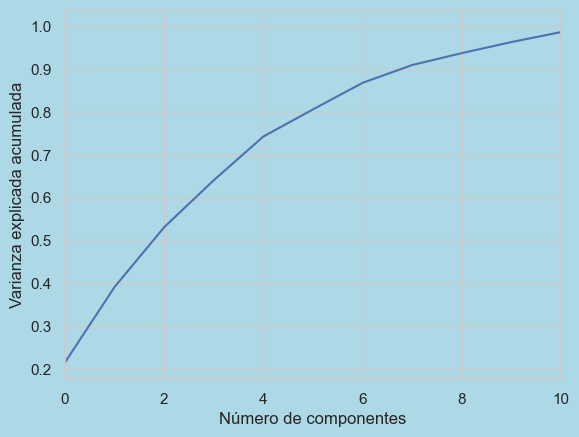

In [136]:
# Variabilidad Acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

Hay tres criterios para elegir el numero de componentes a considerar: 1. Todos aquellos cuyos valor propios sean mayores o iguales a uno 2. Aquellos que reunan en forma acumulada el 80% de la varianza 3. Criterios graficos, conforme se detalla mas abajo


<font color = "red"> DEJAR SOLO LAS QUE EXPLICAN EL 80% Y BORRAS LAS OTRAS. TAREA PARA HCER PREVIO AL ML

In [137]:
Autovalores = pca.explained_variance_
Autovalores.T.sum()

1.0043345388546558

In [141]:
pca.explained_variance_ratio_

array([2.14943985e-01, 1.76245079e-01, 1.39635553e-01, 1.09736976e-01,
       1.02132908e-01, 6.33291340e-02, 6.20497813e-02, 4.16516731e-02,
       2.77666795e-02, 2.58505951e-02, 2.32807689e-02, 7.30530642e-03,
       4.29690305e-03, 1.25301620e-03, 5.21641604e-04, 5.36989647e-32,
       7.04344321e-33])

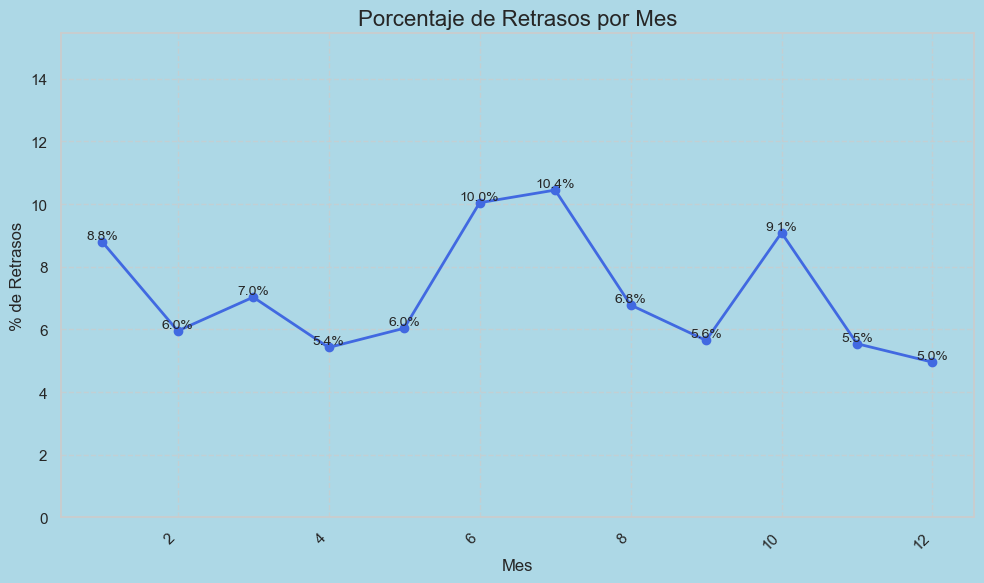

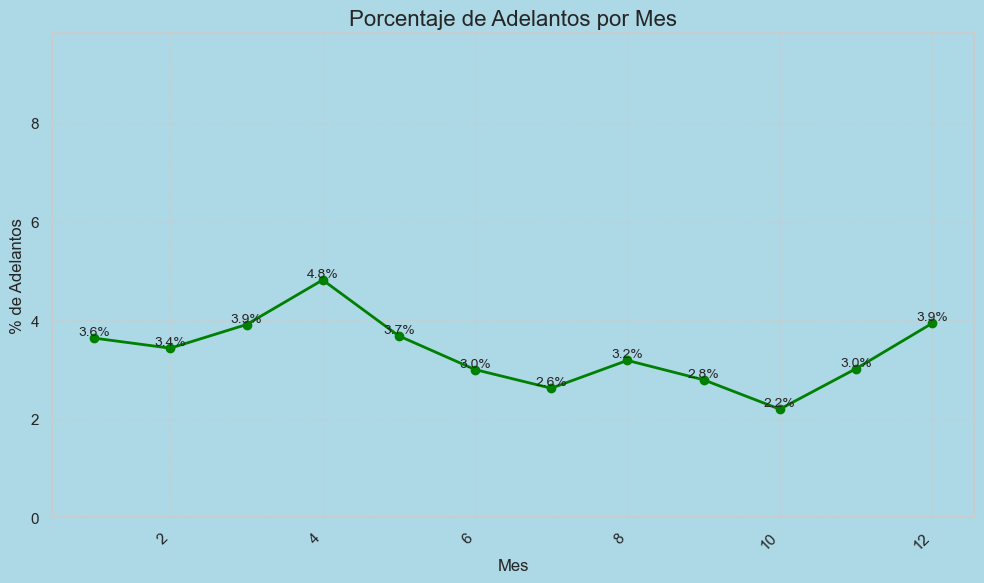

In [142]:
import numpy as np
import pylab as pl

# Configurar el estilo para tener fondo celeste
pl.rcParams['figure.facecolor'] = 'lightblue'
pl.rcParams['axes.facecolor'] = 'lightblue'

# Supongamos que tienes los porcentajes de retrasos y adelantos por mes en las variables 'porcentaje_retrasos_total' y 'porcentaje_adelantos_total'

# Graficar el porcentaje de retrasos por mes
pl.figure(figsize=(10, 6))
pl.plot(porcentaje_retrasos_total.index, porcentaje_retrasos_total.values, marker='o', color='royalblue', linewidth=2)

# Título y etiquetas de los ejes
pl.title('Porcentaje de Retrasos por Mes', fontsize=16)
pl.xlabel('Mes', fontsize=12)
pl.ylabel('% de Retrasos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
pl.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
pl.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
pl.ylim(0, np.max(porcentaje_retrasos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_retrasos_total.index, porcentaje_retrasos_total.values):
    pl.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
pl.tight_layout()
pl.show()

# Graficar el porcentaje de adelantos por mes
pl.figure(figsize=(10, 6))
pl.plot(porcentaje_adelantos_total.index, porcentaje_adelantos_total.values, marker='o', color='green', linewidth=2)

# Título y etiquetas de los ejes
pl.title('Porcentaje de Adelantos por Mes', fontsize=16)
pl.xlabel('Mes', fontsize=12)
pl.ylabel('% de Adelantos', fontsize=12)

# Asegurarnos de que las etiquetas del eje x no se superpongan
pl.xticks(rotation=45, ha='right')

# Mostrar una rejilla en el fondo
pl.grid(True, linestyle='--', alpha=0.7)

# Ajustar el rango del eje y para comenzar desde 0%
pl.ylim(0, np.max(porcentaje_adelantos_total) + 5)

# Mostrar los valores de los puntos en el gráfico
for x, y in zip(porcentaje_adelantos_total.index, porcentaje_adelantos_total.values):
    pl.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
pl.tight_layout()
pl.show()


In [143]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def generar_grafico_retrasos_con_promedio(df, variable, Col_Retraso="Retraso", Codigo_Retraso=1, Min_Vuelos=1000):
    # Calcular el porcentaje de vuelos retrasados por variable
    porcentaje_retrasos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable).size() / df.groupby(variable).size() * 100
    porcentaje_retrasos = porcentaje_retrasos.reset_index(name='Porcentaje_Retrasos')

    # Calcular la cantidad de vuelos por variable
    cantidad_vuelos = df.groupby(variable).size()
    cantidad_vuelos = cantidad_vuelos.reset_index(name='Cantidad_Vuelos')

    # Filtrar solo los atributos con cantidad de vuelos mayor a mil
    cantidad_vuelos = cantidad_vuelos[cantidad_vuelos['Cantidad_Vuelos'] > Min_Vuelos]

    # Calcular el promedio de retraso en minutos
    promedio_retraso_minutos = df[df[Col_Retraso] == Codigo_Retraso].groupby(variable)['Retraso_Minutos'].mean()
    promedio_retraso_minutos = promedio_retraso_minutos.reset_index(name='Promedio_Retraso_Minutos')

    # Combinar los datos de porcentaje de retrasos, cantidad de vuelos y promedio de retraso en minutos
    data = pd.merge(porcentaje_retrasos, cantidad_vuelos, on=variable)
    data = pd.merge(data, promedio_retraso_minutos, on=variable)

    # Ordenar por la cantidad de vuelos
    data = data.sort_values(by='Cantidad_Vuelos', ascending=False)

    if Codigo_Retraso == -1:
        titulo = "Porcentaje de vuelos adelantados por " + variable + " - Ordenados por cantidad"
    else:
        titulo = "Porcentaje de vuelos retrasados por " + variable + " - Ordenados por cantidad"

    # Crear subplots con 2 ejes y títulos personalizados
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Calcular el ancho de las barras
    bar_width = 0.4

    # Convertir valores de la columna variable a cadenas
    x_values = [str(val) for val in data[variable]]

    # Agregar barras para el porcentaje de retrasos
    fig.add_trace(go.Bar(x=x_values, y=data['Porcentaje_Retrasos'], name='Porcentaje Retrasos (%)',
                         offsetgroup=1, width=bar_width,
                         hovertemplate='Porcentaje Retrasos: %{y:.2f}%<br>Cantidad Vuelos: %{customdata}',
                         customdata=data['Cantidad_Vuelos']),
                  secondary_y=False)

    # Agregar barras para el promedio de retraso en minutos
    fig.add_trace(go.Bar(x=x_values, y=data['Promedio_Retraso_Minutos'], name='Promedio Retraso (minutos)',
                         offsetgroup=2, width=bar_width,
                         hovertemplate='Promedio Retraso: %{y:.2f} minutos'),
                  secondary_y=True)

    # Ajustar la posición de las barras
    fig.update_traces(x=[i - bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(x=[i + bar_width / 2 for i in range(len(x_values))], selector=dict(type='bar', offsetgroup=2))

    # Configurar diseño de los subplots
    fig.update_layout(title=titulo,
                      xaxis=dict(title=variable),
                      yaxis=dict(title='Porcentaje de Retrasos (%)'),
                      yaxis2=dict(title='Promedio Retraso (minutos)', overlaying='y', side='right'))

    fig.update_layout(xaxis_tickangle=-45)

    # Configurar la leyenda al pasar el mouse sobre las barras
    fig.update_traces(hovertemplate=None, selector=dict(type='bar', offsetgroup=1))
    fig.update_traces(hovertemplate='%{hovertext}', selector=dict(type='bar', offsetgroup=2))
    # Configurar el estilo para tener fondo celeste
    pl.rcParams['figure.facecolor'] = 'lightblue'
    pl.rcParams['axes.facecolor'] = 'lightblue'
    # Agregar texto de cantidad de vuelos a la leyenda
    fig.add_trace(go.Scatter(x=[], y=[], mode='markers', hoverinfo='text', hovertext=[f"Cantidad Vuelos: {val}" for val in data['Cantidad_Vuelos']]), secondary_y=False)

    fig.show()


Luego, debemos hacer el merge de los componentes que más variabilidad explican con las variables que sacamos arriba (horario programado como variable predictora y retraso y/o retraso_minutos a predecir)

# Graficos Presentacion

In [144]:
!pip install joypy

In [145]:
import joypy

In [146]:
def graficos_distrib_variable(df, variable = "Nombre_Aerolinea_Completo",top_x = 7, titulo = "Retraso/adelanto"):
  import matplotlib.pyplot as plt
  import joypy
  import matplotlib.cm as cm
  import seaborn as sns

  # Establecer el estilo del gráfico (fondo blanco con bordes azules)
  sns.set_style('whitegrid')

  # Obtener el conteo de valores en la columna "Nombre_Aerolinea_Completo"
  conteo_variable = df[variable].value_counts()

  # Obtener los nombres de las 7 aerolíneas más frecuentes, ordenadas por cantidad de vuelos (de arriba a abajo)
  top = conteo_variable.head(top_x).index.tolist()

  # Crear un nuevo DataFrame que contenga solo las filas con las 7 aerolíneas más frecuentes
  df_top = df[df[variable].isin(top)].copy()

  df_top[variable] = pd.Categorical(df_top[variable], categories=top,ordered=True)

  fig, axes = joypy.joyplot(df_top, column=['Retraso_Minutos'], by=variable,
                            ylim='own', figsize=(8, 6), x_range=(-70, 70), color = "#6ce5e8") #colormap=color_map) #color = "lightblue")#

  # Cambiar el color del fondo de la figura a #0571d7
  fig.set_facecolor('#0571d7')

  # Cambiar el color del fondo de los nombres de aerolíneas a #0571d7
  for ax in axes:
      ax.set_facecolor('#0571d7')

  # Cambiar el color del texto de los nombres de aerolíneas a blanco
  for ax in axes:
      for label in ax.get_yticklabels() + ax.get_xticklabels():
          label.set_color('white')
          label.set_fontsize(14)

  # Decoración
  plt.title(titulo, fontsize=18, color='white')
  plt.show()


  #HACER EL DE BARRAS TBN
  # Obtener el conteo de vuelos por aerolínea
  conteo_vuelos = df_top[variable] .value_counts()

  # Obtener los nombres de las aerolíneas y sus respectivos conteos, en el orden deseado
  indices_variable = conteo_vuelos.index[::-1]  # Invertir el orden
  cantidad_vuelos = conteo_vuelos.values[::-1]  # Invertir el orden

  # Crear la figura y los ejes del gráfico
  fig, ax = plt.subplots(figsize=(8, 6))

  # Crear el gráfico de barras horizontales sin bordes
  barras = ax.barh(indices_variable, cantidad_vuelos, color= "#6ce5e8")#color_map(range(num_aerolineas)))

  # Eliminar los bordes de las barras
  for barra in barras:
      barra.set_edgecolor('none')

  # Cambiar el color del fondo de la figura a #0571d7
  fig.set_facecolor('#0571d7')

  # Cambiar el color del fondo del gráfico a #0571d7
  ax.set_facecolor('#0571d7')

  # Cambiar el color del texto de los ejes a blanco
  ax.xaxis.label.set_color('white')
  ax.yaxis.label.set_color('white')
  ax.tick_params(axis='x', colors='white')
  ax.tick_params(axis='y', colors='white')


  # Eliminar los bordes del eje
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_color('black')
  # Ocultar las cuadrículas
  ax.grid(False)

  # Cambiar el color del texto de los nombres de aerolíneas a blanco
  for label in ax.get_yticklabels():
      label.set_color('white')
      label.set_fontsize(14)

  # Establecer límites y etiquetas de los ejes
  ax.set_xlim(0, max(cantidad_vuelos) + 5)  # Ajustar el límite derecho para que no queden barras cercanas al borde
  ax.set_xlabel('Cantidad de Vuelos', fontsize=14)
  ax.set_ylabel(variable, fontsize=14)


  # Agregar anotaciones con los valores en las barras
  for i, barra in enumerate(barras):
      width = barra.get_width()
      ax.annotate('{}'.format(width),
                  xy=(width, barra.get_y() + barra.get_height() / 2),
                  xytext=(3, 0),
                  textcoords="offset points",
                  ha='left', va='center',
                  fontsize=12,
                  color='white')

  # Decoración
  plt.title('Cantidad de Vuelos ', fontsize=18, color='white')

  plt.tight_layout()  # Ajustar los márgenes para evitar cortar elementos del gráfico
  plt.show()

  # Calcular el porcentaje que representa el nuevo df con respecto al df original
  porcentaje = (df_top.shape[0] / df.shape[0]) * 100
  print("% de datos en el top ", top_x, ": ", round(porcentaje,2))
  return

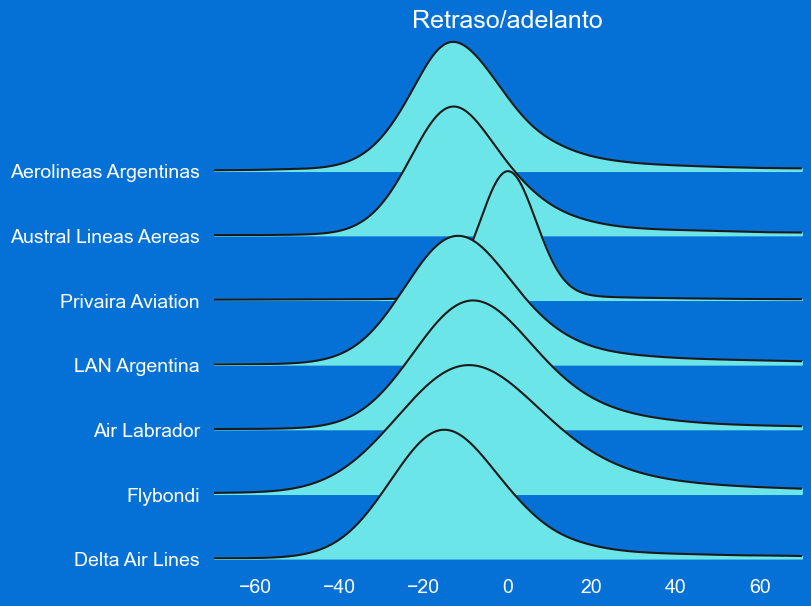

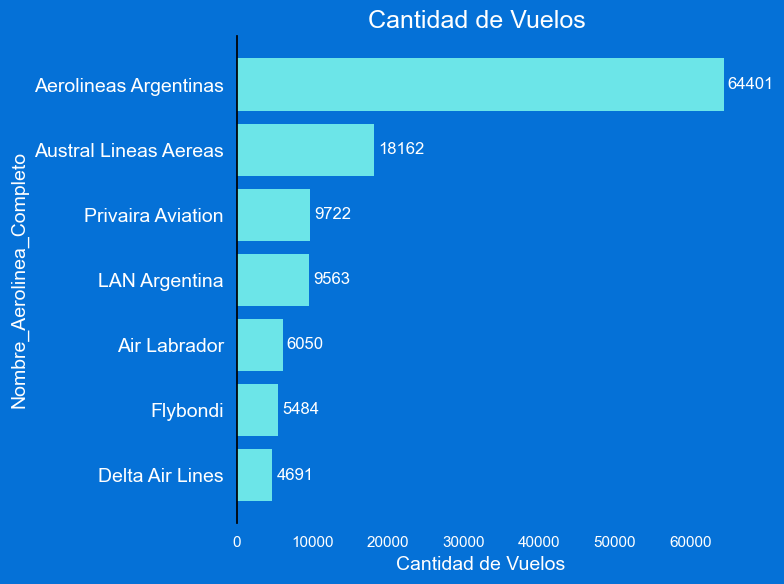

% de datos en el top  7 :  94.02


In [147]:
graficos_distrib_variable(df, variable = "Nombre_Aerolinea_Completo",top_x = 7)#, titulo = "Hola")

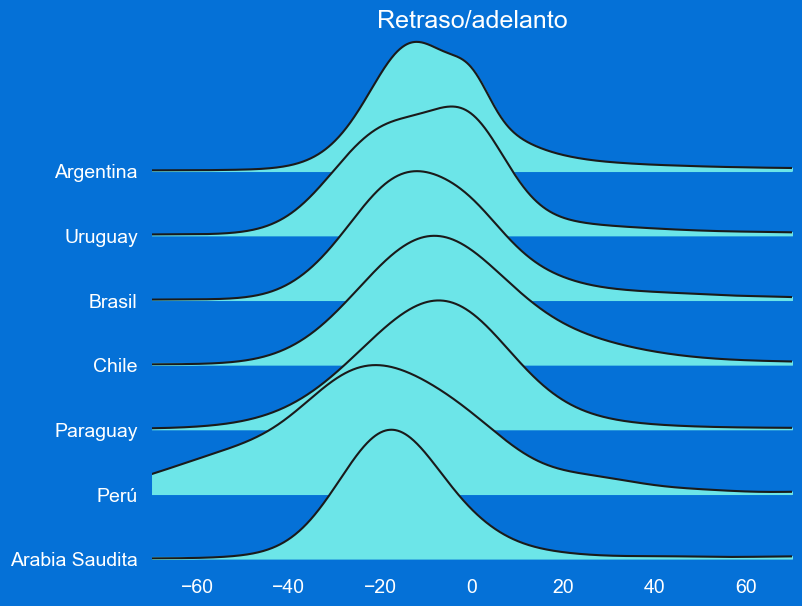

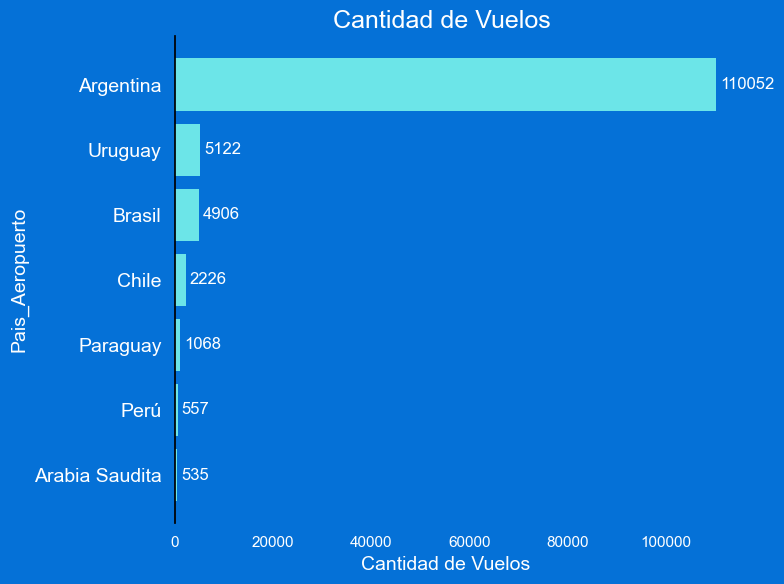

% de datos en el top  7 :  99.11


In [148]:
graficos_distrib_variable(df, variable = "Pais_Aeropuerto",top_x = 7)#, titulo = "Hola")

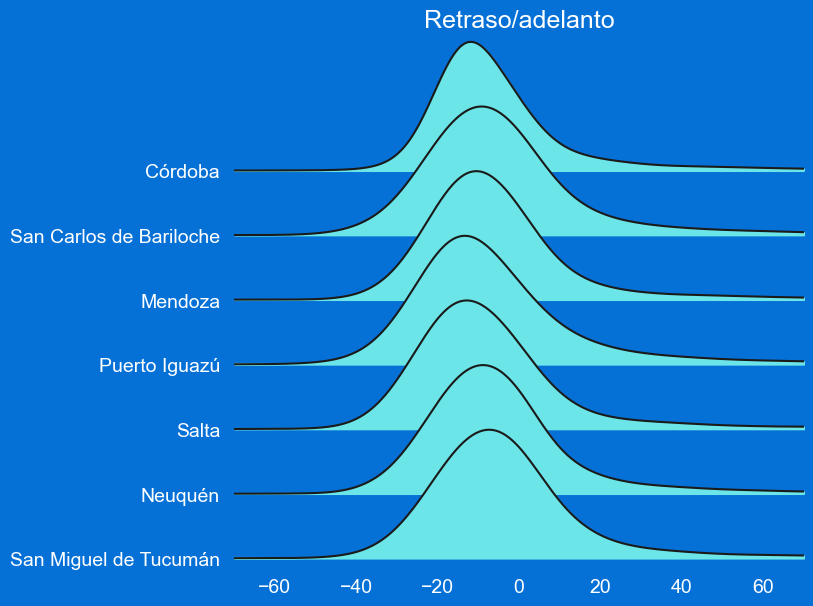

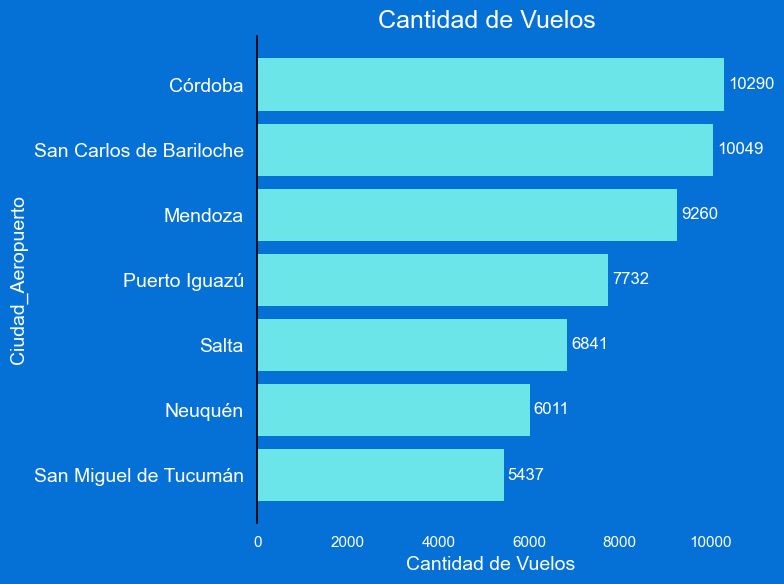

% de datos en el top  7 :  44.29


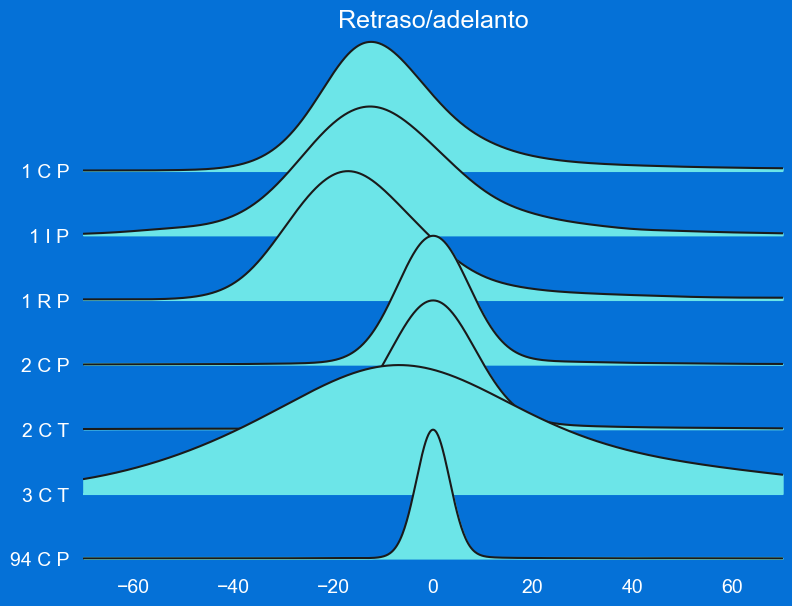

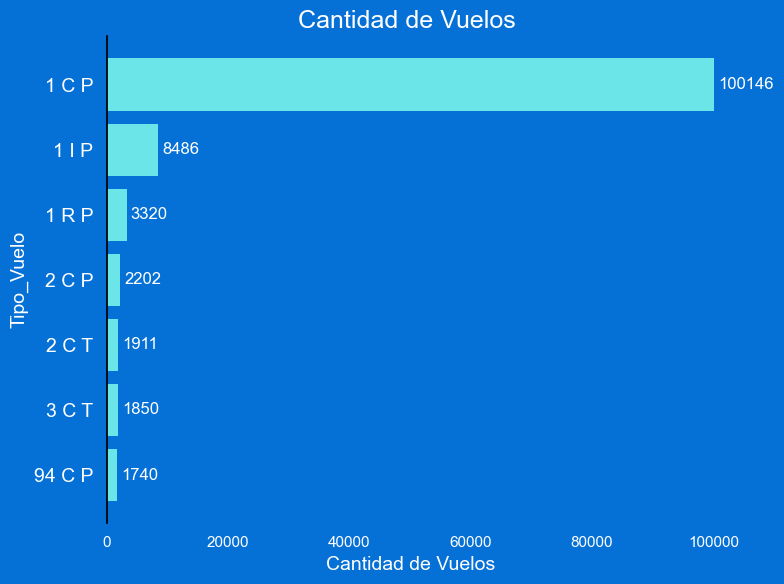

% de datos en el top  7 :  95.28


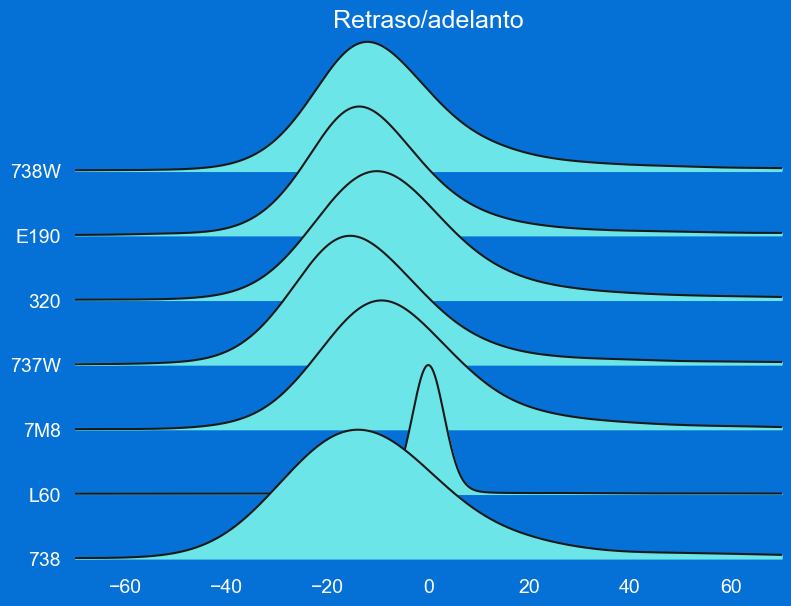

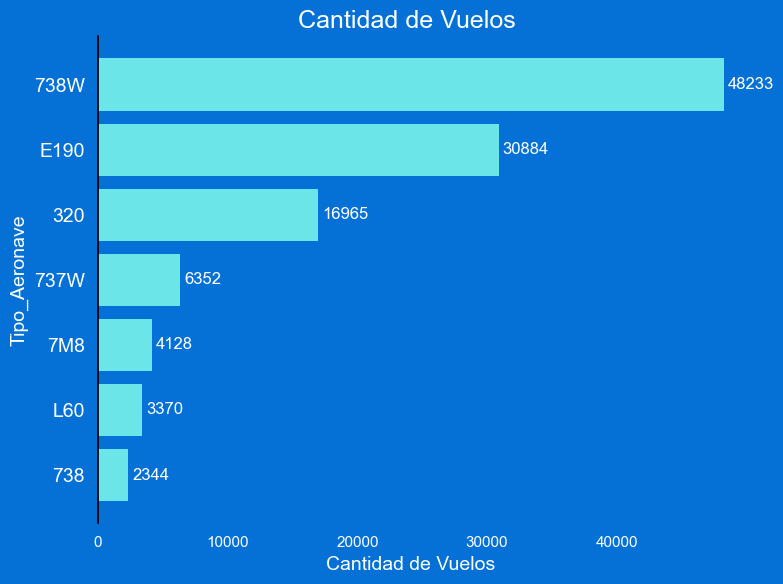

% de datos en el top  7 :  89.4


In [149]:
for variable in ["Ciudad_Aeropuerto", "Tipo_Vuelo", "Tipo_Aeronave"]:
  graficos_distrib_variable(df, variable =variable ,top_x = 7)#, titulo = "Hola")

In [150]:
df.columns

Index(['Nombre_Aerolinea', 'Codigo_Vuelo', 'Ruta_Vuelo', 'Horario_Prog_Arribo',
       'Horario_Estimado_Arribo', 'Horario_Actual_Arribo', 'Tipo_Vuelo',
       'Posicion_Arribo', 'Terminal_Arribo', 'Sector', 'Cinta_Equipajes',
       'Cant_Pasajeros', 'Matricula_Aeronave', 'Tipo_Aeronave',
       'Nombre_Aerolinea_Partida', 'Vuelo_Partida', 'Cabecera_Arribo',
       'Año_Vuelo', 'Mes_Vuelo', 'Hora_Vuelo', 'Pais_Aeropuerto',
       'Ciudad_Aeropuerto', 'Latitud_Aeropuerto', 'Longitud_Aeropuerto',
       'Capacidad_Max_Aeronave', 'Uso_Aeronave', 'Dia_Semana', 'Hora',
       'Hora_Agrupada', 'Mes_Dia', 'Nombre_Aerolinea_Completo', 'Fecha_Arribo',
       'Feriado_Codigo', 'Cant_Feriados', 'Pre_Feriado_3', 'Post_Feriado_3',
       'Pre_Feriado_4', 'Post_Feriado_4', 'Distancia_km',
       'Riesgo_Vuelos_Ahora', 'Riesgo_Vuelos_Ult_4_hs',
       'Riesgo_Vuelos_Ult_8_hs', 'Riesgo_Vuelos_Ult_12_hs', 'Retraso_Minutos',
       'Retraso', 'Retraso_Salida_Minutos', 'Retraso_Salida',
       'Retraso_